In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, OrdinalEncoder

In [ ]:
df_train=pd.read_csv('train-data.csv')
df_train.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
df_test=pd.read_csv('test-data.csv')
df_test.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price
0,0,Maruti Alto K10 LXI CNG,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN
1,1,Maruti Alto 800 2016-2019 LXI,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN
2,2,Toyota Innova Crysta Touring Sport 2.4 MT,Mumbai,2017,34000,Diesel,Manual,First,13.68 kmpl,2393 CC,147.8 bhp,7.0,25.27 Lakh
3,3,Toyota Etios Liva GD,Hyderabad,2012,139000,Diesel,Manual,First,23.59 kmpl,1364 CC,null bhp,5.0,NaN
4,4,Hyundai i20 Magna,Mumbai,2014,29000,Petrol,Manual,First,18.5 kmpl,1197 CC,82.85 bhp,5.0,NaN


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         6019 non-null   int64  
 1   Name               6019 non-null   object 
 2   Location           6019 non-null   object 
 3   Year               6019 non-null   int64  
 4   Kilometers_Driven  6019 non-null   int64  
 5   Fuel_Type          6019 non-null   object 
 6   Transmission       6019 non-null   object 
 7   Owner_Type         6019 non-null   object 
 8   Mileage            6017 non-null   object 
 9   Engine             5983 non-null   object 
 10  Power              5983 non-null   object 
 11  Seats              5977 non-null   float64
 12  New_Price          824 non-null    object 
 13  Price              6019 non-null   float64
dtypes: float64(2), int64(3), object(9)
memory usage: 658.5+ KB


In [ ]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1234 entries, 0 to 1233
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1234 non-null   int64  
 1   Name               1234 non-null   object 
 2   Location           1234 non-null   object 
 3   Year               1234 non-null   int64  
 4   Kilometers_Driven  1234 non-null   int64  
 5   Fuel_Type          1234 non-null   object 
 6   Transmission       1234 non-null   object 
 7   Owner_Type         1234 non-null   object 
 8   Mileage            1234 non-null   object 
 9   Engine             1224 non-null   object 
 10  Power              1224 non-null   object 
 11  Seats              1223 non-null   float64
 12  New_Price          182 non-null    object 
dtypes: float64(1), int64(3), object(9)
memory usage: 125.5+ KB


In [ ]:
df_train.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats,Price
count,6019.000000,6019.000000,6.019000e+03,5977.000000,6019.000000
mean,3009.000000,2013.358199,5.873838e+04,5.278735,9.479468
std,1737.679967,3.269742,9.126884e+04,0.808840,11.187917
min,0.000000,1998.000000,1.710000e+02,0.000000,0.440000
25%,1504.500000,2011.000000,3.400000e+04,5.000000,3.500000
50%,3009.000000,2014.000000,5.300000e+04,5.000000,5.640000
75%,4513.500000,2016.000000,7.300000e+04,5.000000,9.950000
max,6018.000000,2019.000000,6.500000e+06,10.000000,160.000000


In [ ]:
df_test.describe()

,Unnamed: 0,Year,Kilometers_Driven,Seats
count,1234.000000,1234.000000,1234.000000,1223.000000
mean,616.500000,2013.400324,58507.288493,5.284546
std,356.369424,3.179700,35598.702098,0.825622
min,0.000000,1996.000000,1000.000000,2.000000
25%,308.250000,2011.000000,34000.000000,5.000000
50%,616.500000,2014.000000,54572.500000,5.000000
75%,924.750000,2016.000000,75000.000000,5.000000
max,1233.000000,2019.000000,350000.000000,10.000000


In [ ]:
listtrain = df_train['Name']
listtest = df_test['Name']
  
# prints the missing in listrain 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: {'Mahindra KUV 100 D75 K8 5Str', 'Mercedes-Benz A Class Edition 1', 'Honda Amaze E i-DTEC', 'Audi Q3 30 TDI S Edition', 'Maruti Swift VVT ZXI', 'Maruti SX4 ZXI AT', 'BMW 7 Series 730Ld DPE Signature', 'Nissan Terrano XE 85 PS', 'Skoda Laura L and K MT', 'Hyundai Santro Xing XG AT eRLX Euro III', 'Maruti Ciaz VXi', 'BMW 3 Series GT 320d Sport Line', 'Tata Tiago 1.05 Revotorq XT Option', 'Mahindra Thar 4X4', 'Maruti Vitara Brezza ZDi Plus AMT', 'Toyota Etios Liva Diesel TRD Sportivo', 'Chevrolet Sail Hatchback 1.2', 'Honda City i DTec VX Option BL', 'Volkswagen Vento 1.5 TDI Highline Plus', 'Hyundai EON 1.0 Era Plus', 'Tata Tigor 1.2 Revotron XZ Option', 'Tata Indica V2 DiCOR DLG BS-III', 'Tata Indica Vista Quadrajet LX', 'Maruti Swift AMT ZXI', 'Toyota Etios Liva 1.4 VXD', 'Mahindra Xylo H9', 'Hyundai EON 1.0 Kappa Magna Plus', 'Mercedes-Benz E-Class 250 D W 124', 'Hyundai Santro LS zipDrive Euro I', 'Honda Amaze VX CVT i-VTEC', 'Toyota Etios Cross 1.2L G',

In [ ]:
df_train['Cars'] = df_train['Name'].str.split(" ").str[0] + ' ' +df_train['Name'].str.split(" ").str[1]
df_test['Cars'] = df_test['Name'].str.split(" ").str[0] + ' ' +df_test['Name'].str.split(" ").str[1]

In [ ]:
set(df_test['Cars']).issubset(set(df_train['Cars']))

False

In [ ]:
listtrain = df_train['Cars']
listtest = df_test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain)))

Missing values in first list: {'Hindustan Motors', 'Isuzu MU', 'Nissan 370Z', 'Bentley Flying', 'Fiat Abarth', 'Toyota Land', 'OpelCorsa 1.4Gsi'}


In [ ]:
df_test.drop(df_test[df_test['Cars'].isin(['Toyota Land', 'Hindustan Motors', 'Fiat Abarth', 'Nissan 370Z', 
                                  'Isuzu MU', 'Bentley Flying', 'OpelCorsa 1.4Gsi'])].index, inplace = True)

In [ ]:
df_test.shape

(1227, 14)

In [ ]:
listtrain = df_train['Cars']
listtest = df_test['Cars']
  
# prints the missing and additional elements in list1 
print("Missing values in first list:", (set(listtest).difference(listtrain))) 

Missing values in first list: set()


In [ ]:
df_train.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Cars
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti Wagon
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai Creta


In [ ]:
df_train['Name']=df_train['Cars']
df_train.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,Cars
0,0,Maruti Wagon,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75,Maruti Wagon
1,1,Hyundai Creta,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50,Hyundai Creta


In [ ]:
df_test['Name']=df_test['Cars']
df_test.head(2)

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Cars
0,0,Maruti Alto,Delhi,2014,40929,CNG,Manual,First,32.26 km/kg,998 CC,58.2 bhp,4.0,NaN,Maruti Alto
1,1,Maruti Alto,Coimbatore,2013,54493,Petrol,Manual,Second,24.7 kmpl,796 CC,47.3 bhp,5.0,NaN,Maruti Alto


In [ ]:
df_train['Name'].unique()

array(['Maruti Wagon', 'Hyundai Creta', 'Honda Jazz', 'Maruti Ertiga',
       'Audi A4', 'Hyundai EON', 'Nissan Micra', 'Toyota Innova',
       'Volkswagen Vento', 'Tata Indica', 'Maruti Ciaz', 'Honda City',
       'Maruti Swift', 'Land Rover', 'Mitsubishi Pajero', 'Honda Amaze',
       'Renault Duster', 'Mercedes-Benz New', 'BMW 3', 'Maruti S',
       'Audi A6', 'Hyundai i20', 'Maruti Alto', 'Honda WRV',
       'Toyota Corolla', 'Mahindra Ssangyong', 'Maruti Vitara',
       'Mahindra KUV', 'Mercedes-Benz M-Class', 'Volkswagen Polo',
       'Tata Nano', 'Hyundai Elantra', 'Hyundai Xcent', 'Mahindra Thar',
       'Hyundai Grand', 'Renault KWID', 'Hyundai i10', 'Nissan X-Trail',
       'Maruti Zen', 'Ford Figo', 'Mercedes-Benz C-Class',
       'Porsche Cayenne', 'Mahindra XUV500', 'Nissan Terrano',
       'Honda Brio', 'Ford Fiesta', 'Hyundai Santro', 'Tata Zest',
       'Maruti Ritz', 'BMW 5', 'Toyota Fortuner', 'Ford Ecosport',
       'Hyundai Verna', 'Datsun GO', 'Maruti Omni', 'Toyot

In [ ]:
df_train['Name']=df_train['Name'].map({'Maruti Wagon':1, 'Hyundai Creta':2, 'Honda Jazz':3, 'Maruti Ertiga':4,
       'Audi A4':5, 'Hyundai EON':6, 'Nissan Micra':7, 'Toyota Innova':8,
       'Volkswagen Vento':9, 'Tata Indica':10, 'Maruti Ciaz':11, 'Honda City':12,
       'Maruti Swift':13, 'Land Rover':14, 'Mitsubishi Pajero':15, 'Honda Amaze':16,
       'Renault Duster':17, 'Mercedes-Benz New':18, 'BMW 3':19, 'Maruti S':20,
       'Audi A6':21, 'Hyundai i20':22, 'Maruti Alto':23, 'Honda WRV':24,
       'Toyota Corolla':25, 'Mahindra Ssangyong':26, 'Maruti Vitara':27,
       'Mahindra KUV':28, 'Mercedes-Benz M-Class':29, 'Volkswagen Polo':30,
       'Tata Nano':31, 'Hyundai Elantra':32, 'Hyundai Xcent':33, 'Mahindra Thar':34,
       'Hyundai Grand':35, 'Renault KWID':36, 'Hyundai i10':37, 'Nissan X-Trail':38,
       'Maruti Zen':39, 'Ford Figo':40, 'Mercedes-Benz C-Class':41,
       'Porsche Cayenne':42, 'Mahindra XUV500':43, 'Nissan Terrano':44,
       'Honda Brio':45, 'Ford Fiesta':46, 'Hyundai Santro':47, 'Tata Zest':48,
       'Maruti Ritz':49, 'BMW 5':50, 'Toyota Fortuner':51, 'Ford Ecosport':52,
       'Hyundai Verna':53, 'Datsun GO':54, 'Maruti Omni':55, 'Toyota Etios':56,
       'Jaguar XF':57, 'Maruti Eeco':58, 'Honda Civic':59, 'Volvo V40':60,
       'Mercedes-Benz B':61, 'Mahindra Scorpio':62, 'Honda CR-V':63,
       'Mercedes-Benz SLC':64, 'BMW 1':65, 'Chevrolet Beat':66, 'Skoda Rapid':67,
       'Audi RS5':68, 'Mercedes-Benz S':69, 'Skoda Superb':70, 'BMW X5':71,
       'Mercedes-Benz GLC':72, 'Mini Countryman':73, 'Chevrolet Optra':74,
       'Renault Lodgy':75, 'Mercedes-Benz E-Class':76, 'Maruti Baleno':77,
       'Skoda Laura':78, 'Mahindra NuvoSport':79, 'Skoda Fabia':80, 'Tata Indigo':81,
       'Audi Q3':82, 'Skoda Octavia':83, 'Audi A8':84, 'Mahindra Verito':85,
       'Mini Cooper':86, 'Hyundai Santa':87, 'BMW X1':88, 'Hyundai Accent':89,
       'Hyundai Tucson':90, 'Mercedes-Benz GLE':91, 'Maruti A-Star':92,
       'Fiat Grande':93, 'BMW X3':94, 'Ford EcoSport':95, 'Audi Q7':96,
       'Volkswagen Jetta':97, 'Mercedes-Benz GLA':98, 'Maruti Celerio':99,
       'Tata Sumo':100, 'Honda Accord':101, 'BMW 6':102, 'Tata Manza':103,
       'Chevrolet Spark':104, 'Mini Clubman':105, 'Nissan Teana':106, 'Maruti 800':107,
       'Honda BRV':108, 'Jaguar XE':109, 'Tata Xenon':110, 'Audi A3':111,
       'Mercedes-Benz GL-Class':112, 'Honda BR-V':113, 'Volvo S80':114,
       'Renault Captur':115, 'Chevrolet Enjoy':116, 'Mahindra Bolero':117, 'Audi Q5':118,
       'Mitsubishi Cedia':119, 'Maruti S-Cross':120, 'Skoda Yeti':121,
       'Ford Endeavour':122, 'Mercedes-Benz GLS':123, 'Mercedes-Benz A':124,
       'Maruti SX4':125, 'Toyota Camry':126, 'Honda Mobilio':127, 'Fiat Linea':128,
       'Audi TT':129, 'Mahindra Renault':130, 'Jeep Compass':131, 'Ford Ikon':132,
       'Chevrolet Sail':133, 'Mahindra Quanto':134, 'Chevrolet Aveo':135,
       'Mahindra Xylo':136, 'Maruti Esteem':137, 'Tata Safari':138, 'Maruti Ignis':139,
       'Jaguar XJ':140, 'Nissan Sunny':141, 'Mercedes-Benz SLK-Class':142,
       'Volkswagen Passat':143, 'Maruti Dzire':144, 'Chevrolet Cruze':145,
       'Renault Koleos':146, 'Toyota Qualis':147, 'Volkswagen Ameo':148,
       'Maruti Grand':149, 'Datsun redi-GO':150, 'Smart Fortwo':151,
       'Mitsubishi Outlander':152, 'Porsche Cayman':153, 'Mercedes-Benz CLA':154,
       'Volvo XC60':155, 'Tata New':156, 'Porsche Boxster':157, 'Mahindra XUV300':158,
       'Tata Hexa':159, 'Tata Tiago':160, 'BMW 7':161, 'Fiat Avventura':162, 'Tata Tigor':163,
       'Volvo S60':164, 'Ambassador Classic':165, 'Volkswagen Beetle':166,
       'Fiat Petra':167, 'Hyundai Getz':168, 'Audi A7':169, 'Hyundai Elite':170,
       'Ford Aspire':171, 'Volkswagen Tiguan':172, 'Chevrolet Captiva':173,
       'Fiat Punto':174, 'Mahindra TUV':175, 'BMW X6':176, 'Tata Bolt':177,
       'Nissan Evalia':178, 'Renault Scala':179, 'Mahindra Jeep':180,
       'Hyundai Sonata':181, 'Ford Freestyle':182, 'Mahindra Logan':183,
       'Chevrolet Tavera':184, 'Maruti Estilo':185, 'Volvo XC90':186, 'Renault Pulse':187,
       'Mitsubishi Montero':188, 'Porsche Panamera':189, 'Volkswagen CrossPolo':190,
       'Renault Fluence':191, 'Tata Venture':192, 'Tata Nexon':193, 'Isuzu MUX':194,
       'Toyota Platinum':195, 'Mercedes-Benz R-Class':196,
       'Mercedes-Benz CLS-Class':197, 'ISUZU D-MAX':198, 'Mercedes-Benz S-Class':199,
       'Mitsubishi Lancer':200, 'Ford Classic':201, 'Datsun Redi':202, 'Mahindra E':203,
       'Ford Mustang':204, 'Ford Fusion':205, 'Fiat Siena':206, 'Maruti 1000':207,
       'Mercedes-Benz SL-Class':208, 'BMW Z4':216, 'Toyota Prius':209, 'Force One':210,
       'Maruti Versa':211, 'Honda WR-V':212, 'Bentley Continental':213,
       'Lamborghini Gallardo':214, 'Jaguar F':215})

In [ ]:
df_test['Name']=df_test['Name'].map({'Maruti Wagon':1, 'Hyundai Creta':2, 'Honda Jazz':3, 'Maruti Ertiga':4,
       'Audi A4':5, 'Hyundai EON':6, 'Nissan Micra':7, 'Toyota Innova':8,
       'Volkswagen Vento':9, 'Tata Indica':10, 'Maruti Ciaz':11, 'Honda City':12,
       'Maruti Swift':13, 'Land Rover':14, 'Mitsubishi Pajero':15, 'Honda Amaze':16,
       'Renault Duster':17, 'Mercedes-Benz New':18, 'BMW 3':19, 'Maruti S':20,
       'Audi A6':21, 'Hyundai i20':22, 'Maruti Alto':23, 'Honda WRV':24,
       'Toyota Corolla':25, 'Mahindra Ssangyong':26, 'Maruti Vitara':27,
       'Mahindra KUV':28, 'Mercedes-Benz M-Class':29, 'Volkswagen Polo':30,
       'Tata Nano':31, 'Hyundai Elantra':32, 'Hyundai Xcent':33, 'Mahindra Thar':34,
       'Hyundai Grand':35, 'Renault KWID':36, 'Hyundai i10':37, 'Nissan X-Trail':38,
       'Maruti Zen':39, 'Ford Figo':40, 'Mercedes-Benz C-Class':41,
       'Porsche Cayenne':42, 'Mahindra XUV500':43, 'Nissan Terrano':44,
       'Honda Brio':45, 'Ford Fiesta':46, 'Hyundai Santro':47, 'Tata Zest':48,
       'Maruti Ritz':49, 'BMW 5':50, 'Toyota Fortuner':51, 'Ford Ecosport':52,
       'Hyundai Verna':53, 'Datsun GO':54, 'Maruti Omni':55, 'Toyota Etios':56,
       'Jaguar XF':57, 'Maruti Eeco':58, 'Honda Civic':59, 'Volvo V40':60,
       'Mercedes-Benz B':61, 'Mahindra Scorpio':62, 'Honda CR-V':63,
       'Mercedes-Benz SLC':64, 'BMW 1':65, 'Chevrolet Beat':66, 'Skoda Rapid':67,
       'Audi RS5':68, 'Mercedes-Benz S':69, 'Skoda Superb':70, 'BMW X5':71,
       'Mercedes-Benz GLC':72, 'Mini Countryman':73, 'Chevrolet Optra':74,
       'Renault Lodgy':75, 'Mercedes-Benz E-Class':76, 'Maruti Baleno':77,
       'Skoda Laura':78, 'Mahindra NuvoSport':79, 'Skoda Fabia':80, 'Tata Indigo':81,
       'Audi Q3':82, 'Skoda Octavia':83, 'Audi A8':84, 'Mahindra Verito':85,
       'Mini Cooper':86, 'Hyundai Santa':87, 'BMW X1':88, 'Hyundai Accent':89,
       'Hyundai Tucson':90, 'Mercedes-Benz GLE':91, 'Maruti A-Star':92,
       'Fiat Grande':93, 'BMW X3':94, 'Ford EcoSport':95, 'Audi Q7':96,
       'Volkswagen Jetta':97, 'Mercedes-Benz GLA':98, 'Maruti Celerio':99,
       'Tata Sumo':100, 'Honda Accord':101, 'BMW 6':102, 'Tata Manza':103,
       'Chevrolet Spark':104, 'Mini Clubman':105, 'Nissan Teana':106, 'Maruti 800':107,
       'Honda BRV':108, 'Jaguar XE':109, 'Tata Xenon':110, 'Audi A3':111,
       'Mercedes-Benz GL-Class':112, 'Honda BR-V':113, 'Volvo S80':114,
       'Renault Captur':115, 'Chevrolet Enjoy':116, 'Mahindra Bolero':117, 'Audi Q5':118,
       'Mitsubishi Cedia':119, 'Maruti S-Cross':120, 'Skoda Yeti':121,
       'Ford Endeavour':122, 'Mercedes-Benz GLS':123, 'Mercedes-Benz A':124,
       'Maruti SX4':125, 'Toyota Camry':126, 'Honda Mobilio':127, 'Fiat Linea':128,
       'Audi TT':129, 'Mahindra Renault':130, 'Jeep Compass':131, 'Ford Ikon':132,
       'Chevrolet Sail':133, 'Mahindra Quanto':134, 'Chevrolet Aveo':135,
       'Mahindra Xylo':136, 'Maruti Esteem':137, 'Tata Safari':138, 'Maruti Ignis':139,
       'Jaguar XJ':140, 'Nissan Sunny':141, 'Mercedes-Benz SLK-Class':142,
       'Volkswagen Passat':143, 'Maruti Dzire':144, 'Chevrolet Cruze':145,
       'Renault Koleos':146, 'Toyota Qualis':147, 'Volkswagen Ameo':148,
       'Maruti Grand':149, 'Datsun redi-GO':150, 'Smart Fortwo':151,
       'Mitsubishi Outlander':152, 'Porsche Cayman':153, 'Mercedes-Benz CLA':154,
       'Volvo XC60':155, 'Tata New':156, 'Porsche Boxster':157, 'Mahindra XUV300':158,
       'Tata Hexa':159, 'Tata Tiago':160, 'BMW 7':161, 'Fiat Avventura':162, 'Tata Tigor':163,
       'Volvo S60':164, 'Ambassador Classic':165, 'Volkswagen Beetle':166,
       'Fiat Petra':167, 'Hyundai Getz':168, 'Audi A7':169, 'Hyundai Elite':170,
       'Ford Aspire':171, 'Volkswagen Tiguan':172, 'Chevrolet Captiva':173,
       'Fiat Punto':174, 'Mahindra TUV':175, 'BMW X6':176, 'Tata Bolt':177,
       'Nissan Evalia':178, 'Renault Scala':179, 'Mahindra Jeep':180,
       'Hyundai Sonata':181, 'Ford Freestyle':182, 'Mahindra Logan':183,
       'Chevrolet Tavera':184, 'Maruti Estilo':185, 'Volvo XC90':186, 'Renault Pulse':187,
       'Mitsubishi Montero':188, 'Porsche Panamera':189, 'Volkswagen CrossPolo':190,
       'Renault Fluence':191, 'Tata Venture':192, 'Tata Nexon':193, 'Isuzu MUX':194,
       'Toyota Platinum':195, 'Mercedes-Benz R-Class':196,
       'Mercedes-Benz CLS-Class':197, 'ISUZU D-MAX':198, 'Mercedes-Benz S-Class':199,
       'Mitsubishi Lancer':200, 'Ford Classic':201, 'Datsun Redi':202, 'Mahindra E':203,
       'Ford Mustang':204, 'Ford Fusion':205, 'Fiat Siena':206, 'Maruti 1000':207,
       'Mercedes-Benz SL-Class':208, 'BMW Z4':216, 'Toyota Prius':209, 'Force One':210,
       'Maruti Versa':211, 'Honda WR-V':212, 'Bentley Continental':213,
       'Lamborghini Gallardo':214, 'Jaguar F':215})

In [ ]:
df_test['Name'].unique()

array([ 23,   8,  56,  22,  43,  51,   6,  12, 118,  35,  25,  13,  44,
        88,  19, 132,  49,   7,  78,  59,   3,  67,  30,  37,  15,   2,
        50,  77,   5,   4,  11, 124,  52, 122,  53,  27,  81,  99, 133,
        62, 148,   1,  45,  47,  40, 160,  66,  33, 126,   9, 106, 103,
        46,  61, 101,  39,  32,  10,  31,  16,  82,  18, 108,  94, 112,
        54, 139,  92, 109,  95,  28, 162,  63,  89,  57,  76,  29, 136,
       127,  69, 143, 141,  84, 161,  17, 144,  55,  21, 128, 100,  93,
        86,  34, 110, 135, 184,  70, 107, 113,  85,  96,  58, 117,  97,
       170, 163,  14, 186, 176,  90, 104, 145,  72, 125,  36, 168,  74,
       116, 175, 156, 131,  91, 154, 164, 115, 111, 187, 174, 155,  24,
       190,  42,  83, 134, 114, 102, 181, 201, 146,  60,  98, 147, 182,
       198, 211, 150,  64,  75,  48,  26, 137, 105,  71, 173, 130])

In [ ]:
#Drop unnamed coloumn
#Milage engine and power into integer
#Fueltype transmission and ownership type can be converted to int after visualiation
#check null values and outliers
#Visualiation by graph
#Check co relation with price
#Visualisation of features with price

In [ ]:
df_train.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 2
Engine                 36
Power                  36
Seats                  42
New_Price            5195
Price                   0
Cars                    0
dtype: int64

In [ ]:
df_test.isnull().sum()

Unnamed: 0              0
Name                    0
Location                0
Year                    0
Kilometers_Driven       0
Fuel_Type               0
Transmission            0
Owner_Type              0
Mileage                 0
Engine                 10
Power                  10
Seats                  11
New_Price            1046
Cars                    0
dtype: int64

<Axes: >

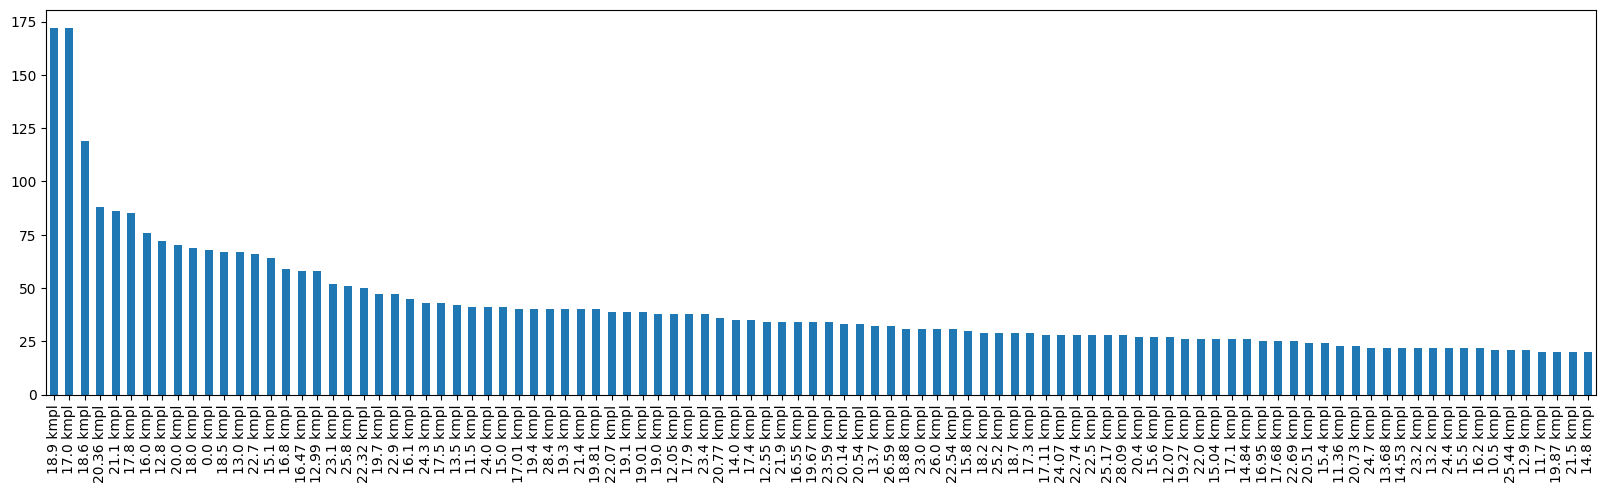

In [ ]:
plt.figure(figsize=(20,5))
df_train['Mileage'].value_counts().head(100).plot.bar()

In [ ]:
df_train['Mileage'] = df_train['Mileage'].fillna('18.9 kmpl')

In [ ]:
df_train['Mileage'].isnull().sum()

0

<Axes: >

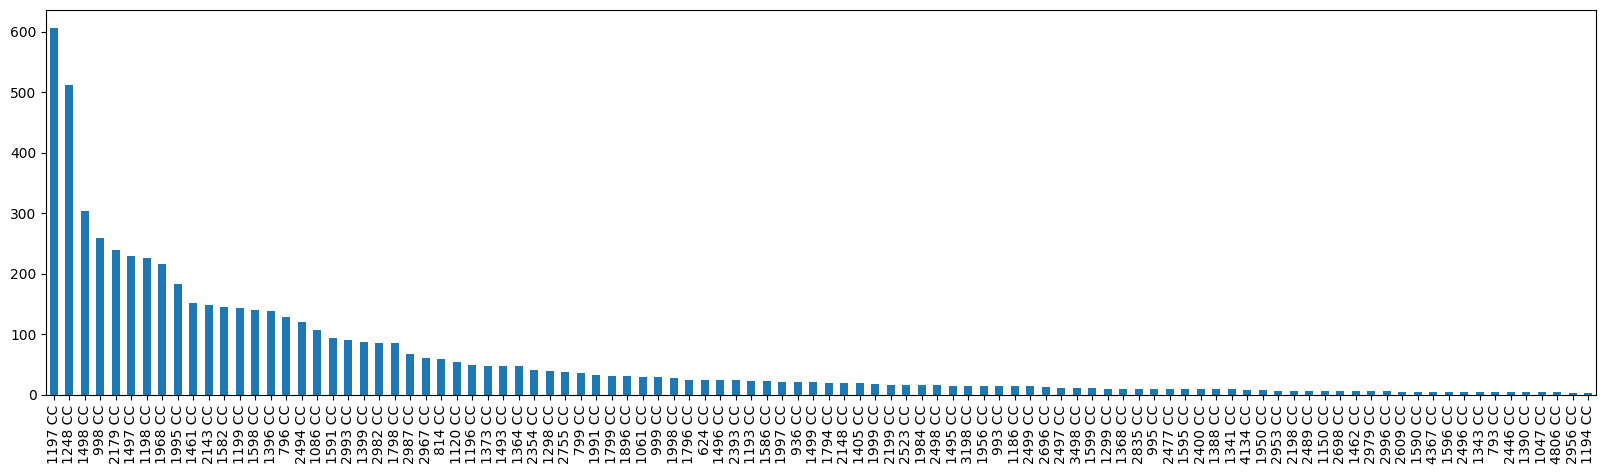

In [ ]:
## removing missing value of Engine
plt.figure(figsize=(20,5))
df_train['Engine'].value_counts().head(100).plot.bar()

In [ ]:
df_train['Engine'] = df_train['Engine'].fillna('1197 CC')
df_train['Engine'].isnull().sum()

0

<Axes: >

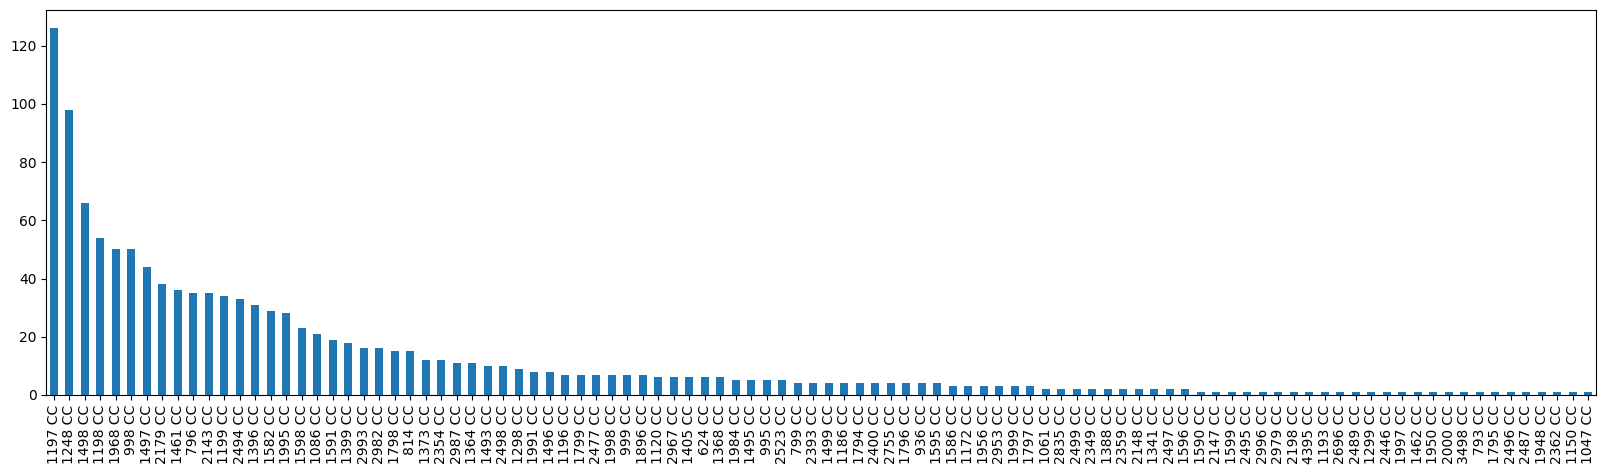

In [ ]:
plt.figure(figsize=(20,5))
df_test['Engine'].value_counts().head(100).plot.bar()

In [ ]:
df_test['Engine'] = df_test['Engine'].fillna('1197 CC')
df_test['Engine'].isnull().sum()

0

<Axes: >

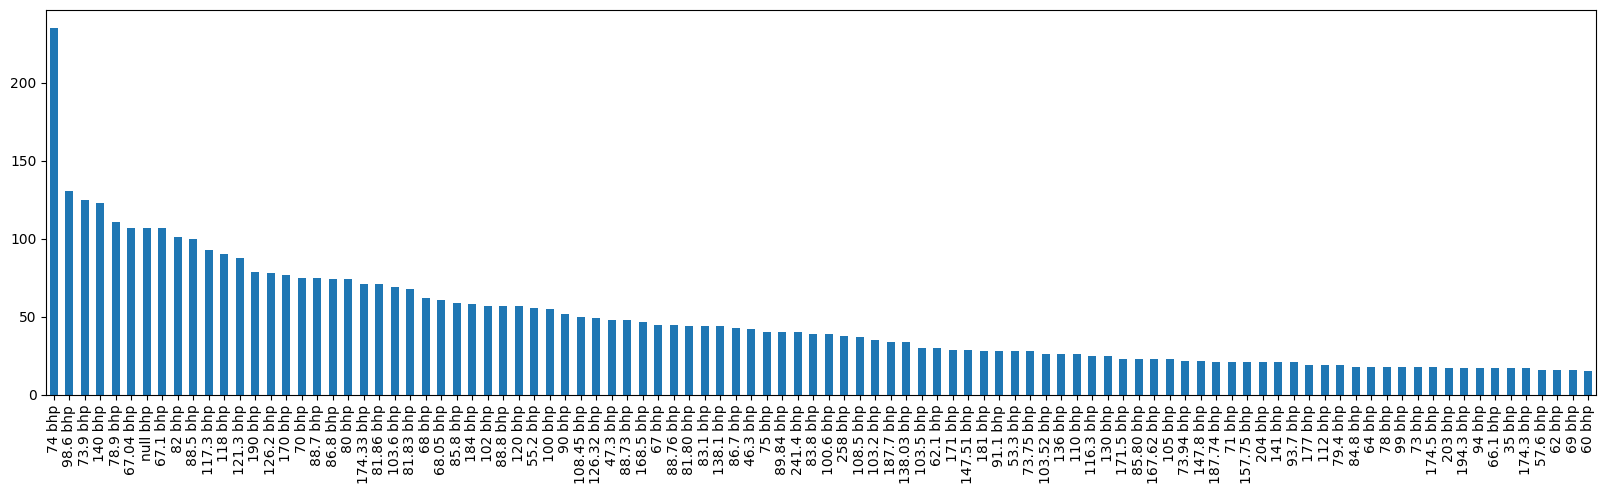

In [ ]:
plt.figure(figsize=(20,5))
df_train['Power'].value_counts().head(100).plot.bar()

In [ ]:
df_train['Power']=df_train['Power'].fillna('74 bhp')
df_train['Power'].isnull().sum()

0

<Axes: >

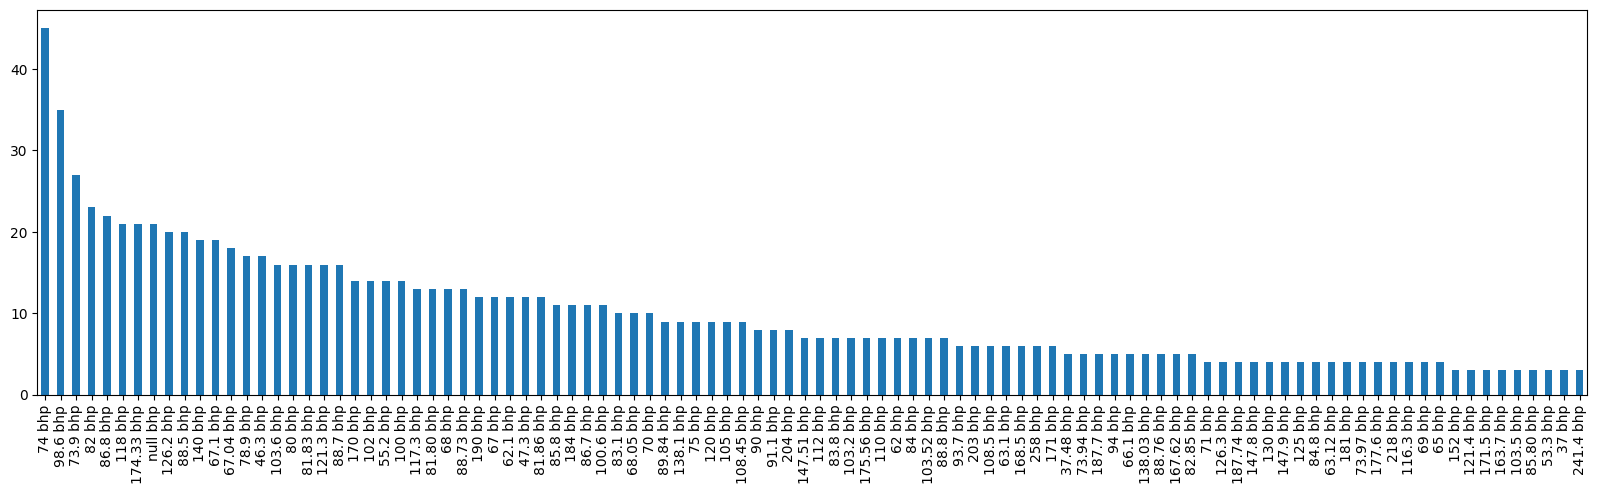

In [ ]:
plt.figure(figsize=(20,5))
df_test['Power'].value_counts().head(100).plot.bar()

In [ ]:
df_test['Power']=df_test['Power'].fillna('74 bhp')
df_test['Power'].isnull().sum()

0

In [ ]:
df_train['Seats'].value_counts()

5.0     5014
7.0      674
8.0      134
4.0       99
6.0       31
2.0       16
10.0       5
9.0        3
0.0        1
Name: Seats, dtype: int64

In [ ]:
df_train['Seats'].fillna(df_train['Seats'].mean(),inplace=True)
df_train['Seats'].isnull().sum()

0

In [ ]:
df_test['Seats'].fillna(df_test['Seats'].mean(),inplace=True)
df_test['Seats'].isnull().sum()

0

In [ ]:
df_train['Name'].value_counts()

13     353
12     270
22     247
53     170
8      164
      ... 
167      1
166      1
165      1
151      1
215      1
Name: Name, Length: 216, dtype: int64

In [ ]:
df_train.drop(['New_Price'],axis=1,inplace=True)
df_train.drop(['Unnamed: 0'],axis=1,inplace=True)


In [ ]:
df_test.drop(['New_Price'],axis=1,inplace=True)
df_test.drop(['Unnamed: 0'],axis=1,inplace=True)


In [ ]:
#milage
df_train['Mileage']=df_train['Mileage'].str.replace(' kmpl','')
df_train['Mileage']=df_train['Mileage'].str.replace(' km/kg','')
df_train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,1,Mumbai,2010,72000,CNG,Manual,First,26.6,998 CC,58.16 bhp,5.0,1.75,Maruti Wagon
1,2,Pune,2015,41000,Diesel,Manual,First,19.67,1582 CC,126.2 bhp,5.0,12.50,Hyundai Creta


In [ ]:
df_train['Mileage']=df_train['Mileage'].astype(float)
df_train['Mileage'].dtype

dtype('float64')

In [ ]:
df_test['Mileage']=df_test['Mileage'].str.replace(' kmpl','')
df_test['Mileage']=df_test['Mileage'].str.replace(' km/kg','')
df_test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Cars
0,23,Delhi,2014,40929,CNG,Manual,First,32.26,998 CC,58.2 bhp,4.0,Maruti Alto
1,23,Coimbatore,2013,54493,Petrol,Manual,Second,24.7,796 CC,47.3 bhp,5.0,Maruti Alto


In [ ]:
df_test['Mileage']=df_test['Mileage'].astype(float)
df_test['Mileage'].dtype

dtype('float64')

In [ ]:
df_train['Engine']=df_train['Engine'].str.replace(' CC','')
df_train['Engine']=df_train['Engine'].astype(float)
df_train['Engine'].dtype
df_train['Power']=df_train['Power'].str.replace(' bhp','')

In [ ]:
df_train['Power']=df_train['Power'].str.replace('null','74')
df_train['Power']=df_train['Power'].str.replace('nan','74')
df_train['Power']=df_train['Power'].astype(float)
df_train['Power'].dtype

dtype('float64')

In [ ]:
df_test['Engine']=df_test['Engine'].str.replace(' CC','')
df_test['Engine']=df_test['Engine'].astype(float)
df_test['Engine'].dtype
df_test['Power']=df_test['Power'].str.replace(' bhp','')

In [ ]:
df_test['Power']=df_test['Power'].str.replace('null','74')
df_test['Power']=df_test['Power'].str.replace('nan','74')
df_test['Power']=df_test['Power'].astype(float)
df_test['Power'].dtype

dtype('float64')

In [ ]:
df_train.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Price                0
Cars                 0
dtype: int64

In [ ]:
df_test.isnull().sum()

Name                 0
Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Cars                 0
dtype: int64

In [ ]:
#Fuel type
fuel_y=df_train['Fuel_Type'].value_counts().index
fuel_x=df_train['Fuel_Type'].value_counts().values

([<matplotlib.patches.Wedge at 0x7f3455084be0>,
 [Text(-0.11204979029926095, 1.0942782299277876, 'Diesel'),
  Text(0.0731489122622724, -1.097565140041741, 'Petrol'),
  Text(1.0990411953448525, -0.0459178716292258, 'CNG'),
  Text(1.099970632614856, -0.00803787191201093, 'LPG'),
  Text(1.0999994006845948, -0.0011482567364040888, 'Electric')],
 [Text(-0.0611180674359605, 0.5968790345060658, '53.25%'),
  Text(0.03989940668851221, -0.5986718945682223, '45.62%'),
  Text(0.5994770156426468, -0.025046111797759524, '0.93%'),
  Text(0.599983981426285, -0.00438429377018778, '0.17%'),
  Text(0.5999996731006879, -0.000626321856220412, '0.03%')])

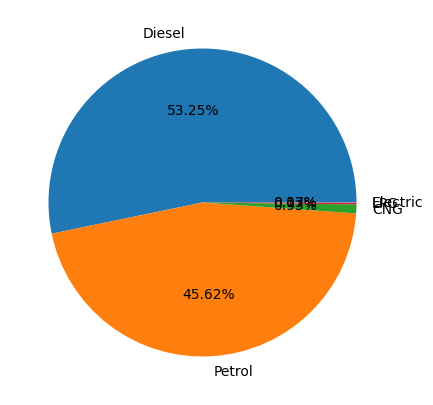

In [ ]:
plt.figure(figsize=(20,5))
plt.pie(fuel_x,labels=fuel_y,autopct="%1.2f%%")

In [ ]:
fuel_y=df_test['Fuel_Type'].value_counts().index
fuel_x=df_test['Fuel_Type'].value_counts().values

([<matplotlib.patches.Wedge at 0x7f345502b310>,
 [Text(-0.08581373190689615, 1.0966476204397708, 'Diesel'),
  Text(0.0633346611233081, -1.098175177601641, 'Petrol'),
  Text(1.0996394674656387, -0.028160994156578228, 'CNG'),
  Text(1.099985578625817, -0.005632656143145425, 'LPG')],
 [Text(-0.04680749013103425, 0.5981714293307839, '52.49%'),
  Text(0.03454617879453169, -0.5990046423281677, '46.86%'),
  Text(0.5998033458903483, -0.015360542267224487, '0.49%'),
  Text(0.5999921337959001, -0.0030723578962611403, '0.16%')])

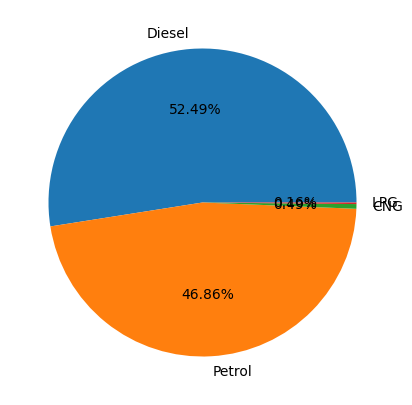

In [ ]:
plt.figure(figsize=(20,5))
plt.pie(fuel_x,labels=fuel_y,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x7f3454f56700>,
 [Text(-0.6857104709372286, 0.8601169397512435, 'Manual'),
  Text(0.6857103904072654, -0.8601170039520878, 'Automatic')],
 [Text(-0.3740238932384883, 0.4691546944097691, '71.42%'),
  Text(0.3740238493130539, -0.4691547294284114, '28.58%')])

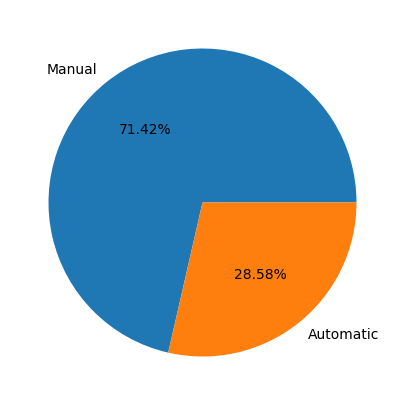

In [ ]:
transmission_y=df_train['Transmission'].value_counts().index
transmission_x=df_train['Transmission'].value_counts().values
plt.figure(figsize=(20,5))
plt.pie(transmission_x,labels=transmission_y,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x7f3454f216a0>,
 [Text(-0.7406365693285208, 0.8133003579079989, 'Manual'),
  Text(0.7406365693285205, -0.8133003579079995, 'Automatic')],
 [Text(-0.40398358327010225, 0.44361837704072665, '73.51%'),
  Text(0.40398358327010203, -0.44361837704072693, '26.49%')])

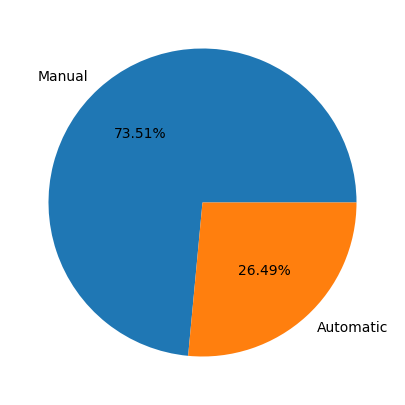

In [ ]:
transmission_y=df_test['Transmission'].value_counts().index
transmission_x=df_test['Transmission'].value_counts().values
plt.figure(figsize=(20,5))
plt.pie(transmission_x,labels=transmission_y,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x7f3454ef8250>,
 [Text(-0.9267309535095531, 0.5925957642501966, 'First'),
  Text(0.8871432478772125, -0.6503667102073036, 'Second'),
  Text(1.0974296768841592, -0.07515387078474318, 'Third'),
  Text(1.0999878631481763, -0.005167293944506986, 'Fourth & Above')],
 [Text(-0.5054896110052107, 0.3232340532273799, '81.89%'),
  Text(0.48389631702393404, -0.3547454782948929, '16.08%'),
  Text(0.5985980055731777, -0.04099302042804173, '1.88%'),
  Text(0.5999933798990053, -0.0028185239697310835, '0.15%')])

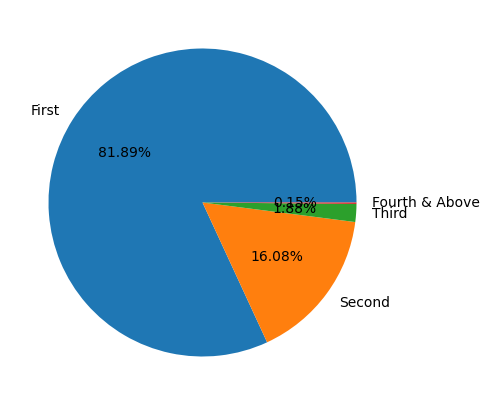

In [ ]:
Owner_y=df_train['Owner_Type'].value_counts().index
Owner_x=df_train['Owner_Type'].value_counts().values
plt.figure(figsize=(20,5))
plt.pie(Owner_x,labels=Owner_y,autopct="%1.2f%%")

([<matplotlib.patches.Wedge at 0x7f3454e56430>,
 [Text(-0.9476610636999685, 0.5585145551792221, 'First'),
  Text(0.9068179975186287, -0.6226404414879464, 'Second'),
  Text(1.0967566041711425, -0.08440942605529254, 'Third'),
  Text(1.0999675518406677, -0.008448958376512838, 'Fourth & Above')],
 [Text(-0.5169060347454373, 0.30464430282503024, '83.05%'),
  Text(0.4946279986465246, -0.33962205899342524, '14.75%'),
  Text(0.5982308750024413, -0.04604150512106865, '1.96%'),
  Text(0.5999823010040005, -0.004608522750825184, '0.24%')])

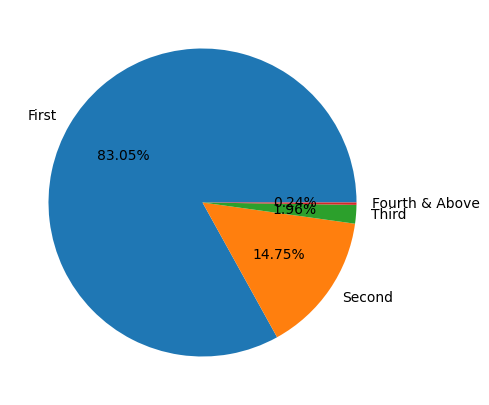

In [ ]:
Owner_y=df_test['Owner_Type'].value_counts().index
Owner_x=df_test['Owner_Type'].value_counts().values
plt.figure(figsize=(20,5))
plt.pie(Owner_x,labels=Owner_y,autopct="%1.2f%%")

In [ ]:
# converting fuel,transmission,owner type to int
df_train['Fuel_Type'].unique()

array(['CNG', 'Diesel', 'Petrol', 'LPG', 'Electric'], dtype=object)

In [ ]:
df_train['Fuel_Type']=df_train['Fuel_Type'].map({'CNG':1, 'Diesel':2, 'Petrol':3, 'LPG':4, 'Electric':5})

In [ ]:
df_test['Fuel_Type'].unique()

array(['CNG', 'Petrol', 'Diesel', 'LPG'], dtype=object)

In [ ]:
df_test['Fuel_Type']=df_test['Fuel_Type'].map({'CNG':1, 'Diesel':2, 'Petrol':3, 'LPG':4, 'Electric':5})

In [ ]:
df_train['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df_train['Transmission']=df_train['Transmission'].map({'Manual':1, 'Automatic':2})

In [ ]:
df_test['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [ ]:
df_test['Transmission']=df_test['Transmission'].map({'Manual':1, 'Automatic':2})

In [ ]:
df_train['Owner_Type'].unique()

array(['First', 'Second', 'Fourth & Above', 'Third'], dtype=object)

In [ ]:
df_train['Owner_Type']=df_train['Owner_Type'].map({'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3})

In [ ]:
df_test['Owner_Type'].unique()

array(['First', 'Second', 'Third', 'Fourth & Above'], dtype=object)

In [ ]:
df_test['Owner_Type']=df_test['Owner_Type'].map({'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3})

In [ ]:
#outliers
df_train['Price'].mean()

9.47946835022429

In [ ]:
df_train['Price'].std()

11.1879171124555

In [ ]:
lower_limit = df_train['Price'].mean() - 3*df_train['Price'].std()
upper_limit = df_train['Price'].mean() + 3*df_train['Price'].std()
print(lower_limit)
print(upper_limit)

-24.08428298714221
43.043219687590785


In [ ]:
df_scores_filtered=df_train['Price'][(df_train['Price']>lower_limit)&(df_train['Price']<upper_limit)]
print(df_scores_filtered)

0        1.75
1       12.50
2        4.50
3        6.00
4       17.74
        ...  
6014     4.75
6015     4.00
6016     2.90
6017     2.65
6018     2.50
Name: Price, Length: 5870, dtype: float64


In [ ]:
df_train.shape

(6019, 13)

<ipython-input-77-2ad0b97deb2d>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Price'])


<Axes: xlabel='Price', ylabel='Density'>

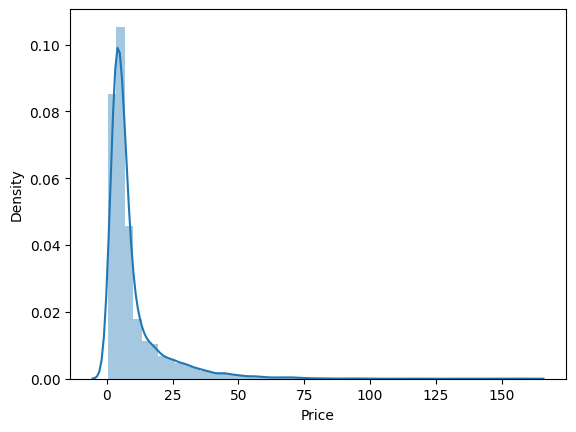

In [ ]:

sns.distplot(df_train['Price'])

In [ ]:
print("Skewness: %f" % df_train['Price'].skew())
print("Kurtosis: %f" % df_train['Price'].kurt())

Skewness: 3.335232
Kurtosis: 17.092202


In [ ]:
outliers=[]
def detect_outliers(data):
    
    threshold=3
    mean = np.mean(data)
    std =np.std(data)
    
    
    for i in data:
        z_score= (i - mean)/std 
        if np.abs(z_score) > threshold:
            outliers.append(i)
    return outliers


In [ ]:
outlier_pt=detect_outliers(df_train['Price'])

In [ ]:
len(outlier_pt)

149

In [ ]:
sorted(outlier_pt)

[43.3,
 43.35,
 43.6,
 43.74,
 43.78,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.0,
 44.5,
 44.56,
 44.76,
 44.83,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.0,
 45.52,
 45.61,
 45.62,
 45.64,
 45.73,
 45.77,
 45.82,
 45.86,
 46.0,
 46.95,
 47.35,
 47.5,
 47.5,
 47.7,
 48.0,
 48.0,
 48.0,
 48.0,
 48.0,
 48.0,
 48.22,
 48.5,
 48.5,
 48.63,
 48.76,
 48.91,
 49.0,
 49.0,
 49.0,
 49.22,
 49.24,
 49.79,
 50.0,
 50.22,
 50.29,
 50.5,
 50.66,
 50.97,
 51.0,
 51.35,
 51.43,
 51.52,
 51.69,
 52.0,
 52.0,
 52.0,
 52.5,
 52.5,
 52.54,
 53.11,
 53.83,
 54.0,
 54.0,
 54.45,
 55.0,
 55.0,
 55.54,
 55.7,
 55.76,
 56.0,
 56.0,
 56.0,
 56.0,
 56.14,
 56.5,
 56.73,
 56.8,
 57.0,
 57.0,
 58.0,
 58.54,
 58.73,
 58.91,
 59.0,
 59.29,
 59.65,
 59.72,
 60.0,
 60.75,
 60.95,
 61.25,
 61.29,
 62.67,
 62.81,
 64.0,
 64.75,
 64.87,
 64.95,
 65.0,
 65.0,
 65.0,
 65.81,
 67.0,
 67.0,
 67.83,
 68.0,
 68.94,
 69.5,
 70.0,
 70.0,
 70.15,
 70.36,
 70.66,
 70.8,
 70.99,
 72.0,
 72.94,
 75.0,


In [ ]:
#  Limitations of Z-Score
# Though Z-Score is a highly efficient way of detecting and removing outliers, we cannot use it with every data type.
# When we said that, we mean that it only works with the data which is completely or close to normally distributed,
# which in turn stimulates that this method is not for skewed data, either left skew or right skew.
# For the other data, we have something known as Inter quartile range (IQR) method

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6019 entries, 0 to 6018
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               6019 non-null   int64  
 1   Location           6019 non-null   object 
 2   Year               6019 non-null   int64  
 3   Kilometers_Driven  6019 non-null   int64  
 4   Fuel_Type          6019 non-null   int64  
 5   Transmission       6019 non-null   int64  
 6   Owner_Type         6019 non-null   int64  
 7   Mileage            6019 non-null   float64
 8   Engine             6019 non-null   float64
 9   Power              6019 non-null   float64
 10  Seats              6019 non-null   float64
 11  Price              6019 non-null   float64
 12  Cars               6019 non-null   object 
dtypes: float64(5), int64(6), object(2)
memory usage: 611.4+ KB


In [ ]:
sorted(df_train['Price'])

[0.44,
 0.45,
 0.45,
 0.45,
 0.5,
 0.5,
 0.51,
 0.53,
 0.53,
 0.55,
 0.55,
 0.55,
 0.6,
 0.6,
 0.63,
 0.65,
 0.65,
 0.69,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.7,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.75,
 0.77,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.8,
 0.82,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.85,
 0.86,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.9,
 0.91,
 0.92,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.95,
 0.99,
 0.99,
 0.99,
 0.99,
 0.99,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.02,
 1.05,
 1.05,
 1.09,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.1,
 1.11,
 1.11,
 1.11,
 1.12,
 1.15,
 1.15,
 1.15,
 1.15,
 1.15,
 1.15,
 1.15,
 1.17,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.2,
 1.22,
 1.24,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 1.25,
 

In [ ]:
quantile1, quantile3= np.percentile(df_train['Price'],[25,75])

In [ ]:
print(quantile1,quantile3)

3.5 9.95


In [ ]:
iqr_value=quantile3-quantile1
print(iqr_value)

6.449999999999999


In [ ]:
lower_limit = quantile1 -(1.5 * iqr_value) 
upper_limit = quantile3 +(1.5 * iqr_value) 


In [ ]:
print(lower_limit,upper_limit)

-6.174999999999999 19.625


<Axes: >

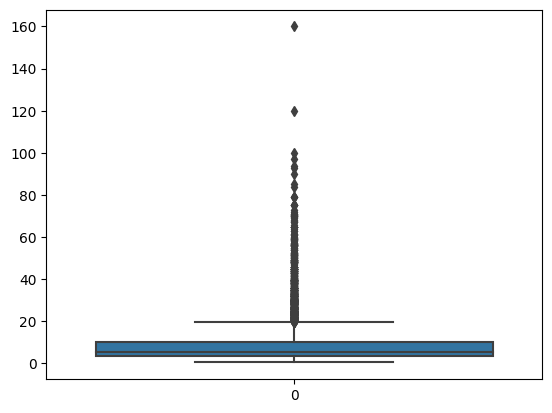

In [ ]:
sns.boxplot(data = df_train['Price'])

In [ ]:
new_df_cap = df_train.copy()

new_df_cap['Price'] = np.where(
    new_df_cap['Price'] > upper_limit,
    upper_limit,
    np.where(
        new_df_cap['Price'] < lower_limit,
        lower_limit,
        new_df_cap['Price']
    )
)

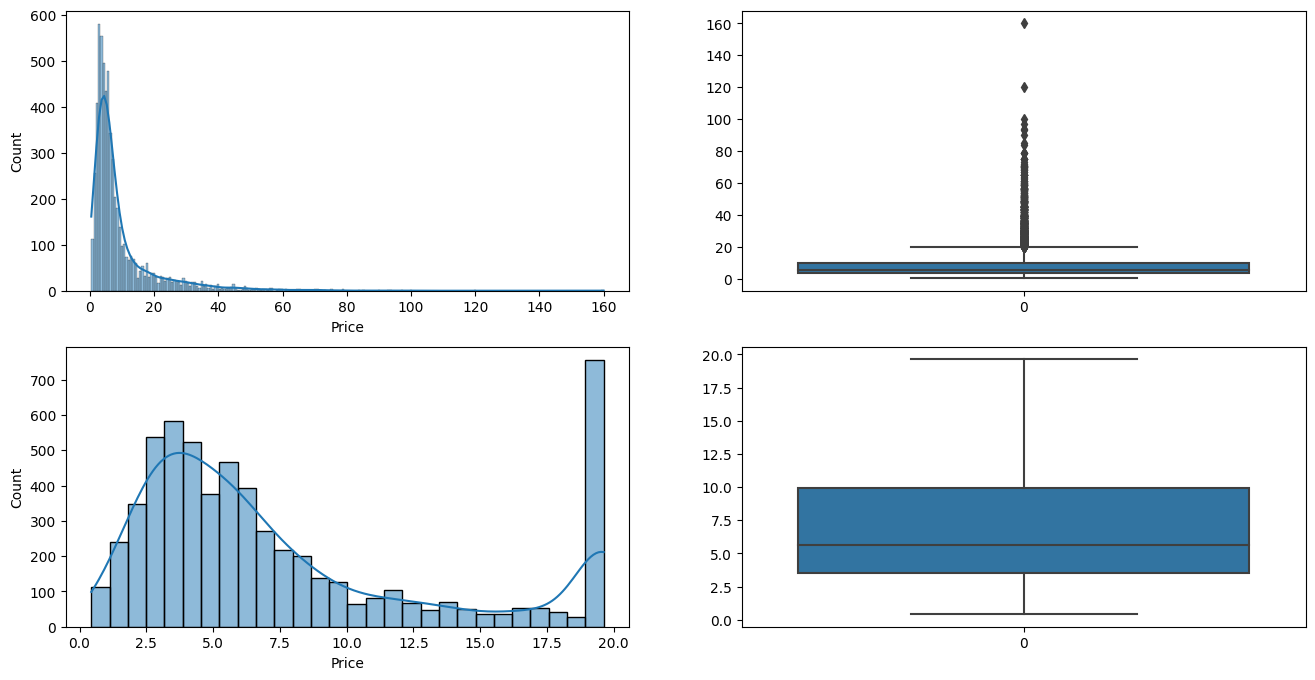

In [ ]:
# Comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.histplot(df_train['Price'], kde=True)

plt.subplot(2,2,2)
sns.boxplot(data = df_train['Price'])

plt.subplot(2,2,3)
sns.histplot(new_df_cap['Price'], kde=True)

plt.subplot(2,2,4)
sns.boxplot(data = new_df_cap['Price'])

plt.show()

<ipython-input-94-d9d893507918>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(new_df_cap['Price'])


<Axes: xlabel='Price', ylabel='Density'>

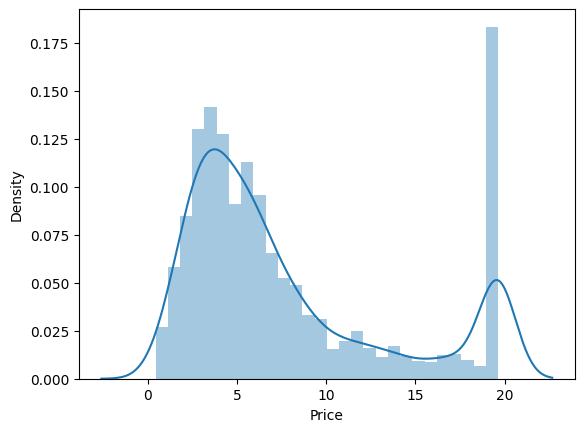

In [ ]:
sns.distplot(new_df_cap['Price'])

In [ ]:
print("Skewness: %f" % new_df_cap['Price'].skew())
print("Kurtosis: %f" % new_df_cap['Price'].kurt())

Skewness: 1.064430
Kurtosis: -0.168472


<ipython-input-96-3555459c511f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_train['Price'], fit=None);


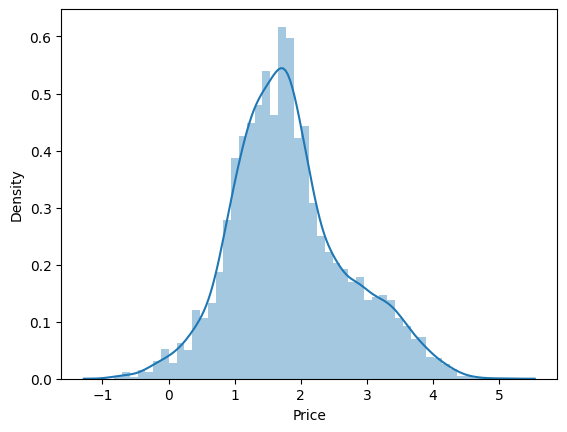

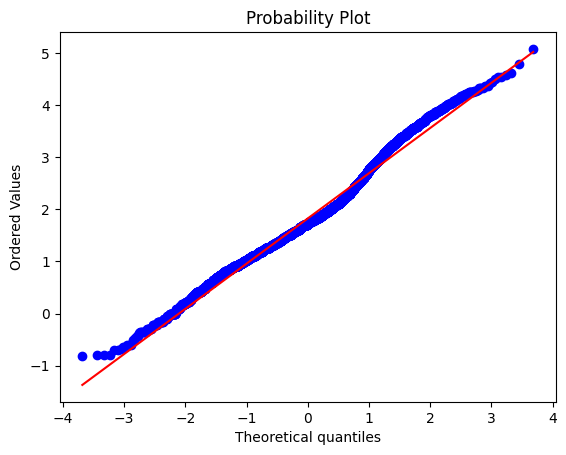

In [ ]:
from scipy import stats
#applying log transformation
df_train['Price'] = np.log(df_train['Price'])
#transformed histogram and normal probability plot
#sns.distplot(data['Price']);
sns.distplot(df_train['Price'], fit=None);
fig = plt.figure()
res = stats.probplot(df_train['Price'], plot=plt)

In [ ]:
yprop = 'Price'
xprop = 'Power'
h= 'Fuel_Type'
px.scatter(df_train, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

In [ ]:
yprop = 'Price'
xprop = 'Engine'
h= 'Transmission'
px.scatter(df_train, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")

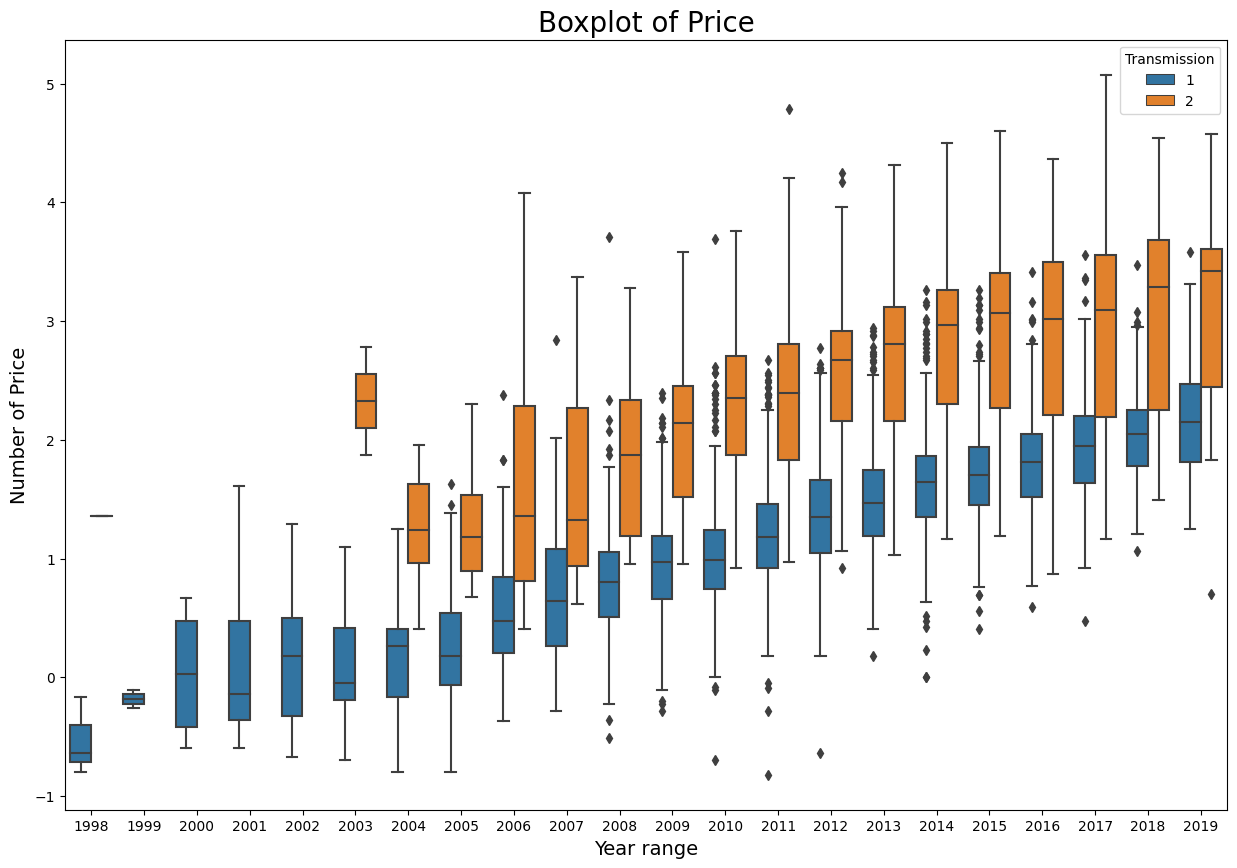

In [ ]:
plt.figure(figsize=(15,10))
xprop = 'Year'
yprop = 'Price'
sns.boxplot(data=df_train, x=xprop, y=yprop, hue='Transmission')
plt.xlabel('{} range'.format(xprop), size=14)
plt.ylabel('Number of {}'.format(yprop), size=14)
plt.title('Boxplot of {}'.format(yprop), size=20)
plt.show()

In [ ]:
yprop = 'Price'
xprop = 'Year'
h= 'Owner_Type'
px.scatter(df_train, x=xprop, y=yprop, color=h, marginal_y="violin", marginal_x="box", trendline="ols", template="simple_white")
#fig.update_layout(xaxis_range=[0,5e5])


In [ ]:
result = df_train.groupby('Fuel_Type')['Price'].mean()
print(result)

Fuel_Type
1    1.186583
2    2.180225
3    1.426548
4    0.876671
5    2.555240
Name: Price, dtype: float64


In [ ]:
# 'CNG':1, 'Diesel':2, 'Petrol':3, 'LPG':4, 'Electric':5sns.barplot('Fuel_Type','Price',data=df_train)
# electric vehicle has highest price then diesel then petrol ,CNG and we have least price Lpg

In [ ]:
# 'First':1, 'Second':2, 'Fourth & Above':4, 'Third':3
#sns.barplot('Owner_Type','Price',data=df_train)
# first hand  price is highest then second hand

In [ ]:
# 'Manual':1, 'Automatic':2
#sns.barplot('Transmission','Price',data=df_train)
# price of automatic transmission vehicle price is greater than manual

In [ ]:
df_train.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,1,Mumbai,2010,72000,1,1,1,26.60,998.0,58.16,5.0,0.559616,Maruti Wagon
1,2,Pune,2015,41000,2,1,1,19.67,1582.0,126.20,5.0,2.525729,Hyundai Creta
2,3,Chennai,2011,46000,3,1,1,18.20,1199.0,88.70,5.0,1.504077,Honda Jazz
3,4,Chennai,2012,87000,2,1,1,20.77,1248.0,88.76,7.0,1.791759,Maruti Ertiga
4,5,Coimbatore,2013,40670,2,2,2,15.20,1968.0,140.80,5.0,2.875822,Audi A4


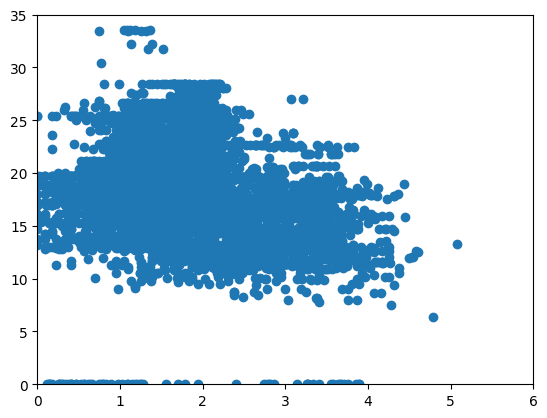

In [ ]:
plt.scatter(df_train['Price'], df_train['Mileage'])
plt.xlim([0,6])
plt.ylim([0,35])
plt.show()
# most of the vehicle below 1 lakhs have mileage from 12 to 22 
# price range between 1 to 3 lakhs have mileage from 12 to 30 

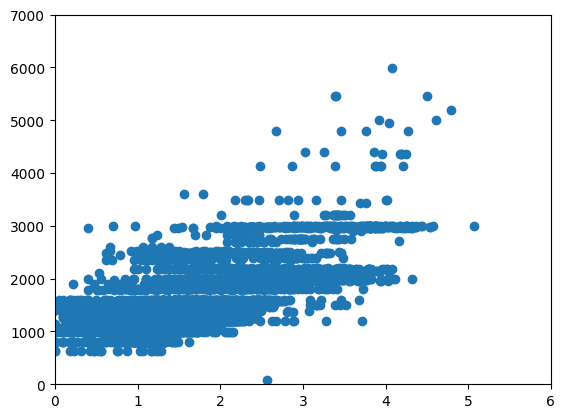

In [ ]:
plt.scatter(df_train['Price'], df_train['Engine'])
plt.xlim([0,6])
plt.ylim([0,7000])
plt.show()
#bigger cylinders make more power because they can burn more fuel per stroke.
#as engine size is increasing price is increasing 

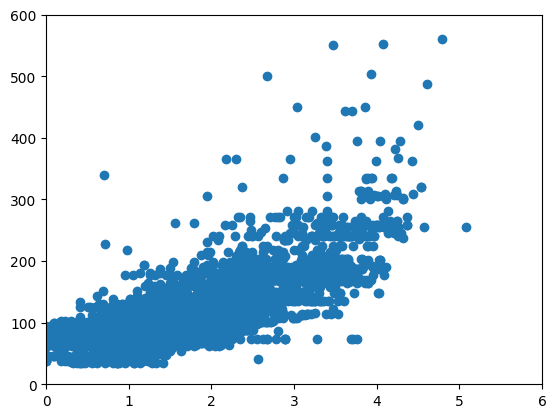

In [ ]:
plt.scatter(df_train['Price'], df_train['Power'])
plt.xlim([0,6])
plt.ylim([0,600])
plt.show()
# as power increases price increases

In [ ]:
df_train['Kilometers_Driven'].value_counts()

60000    82
45000    70
65000    68
50000    61
55000    60
         ..
28937     1
82085     1
68465     1
63854     1
27365     1
Name: Kilometers_Driven, Length: 3093, dtype: int64

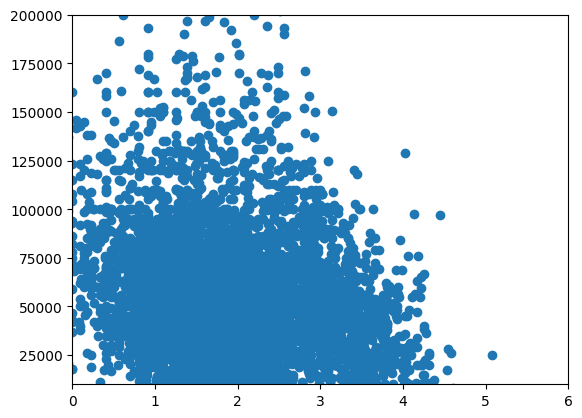

In [ ]:
plt.scatter(df_train['Price'], df_train['Kilometers_Driven'])
plt.xlim([0,6])
plt.ylim([10000,200000])
plt.show()
#most of the vehicle are driven from 0 to 1 lakh km

<Axes: xlabel='Year', ylabel='Price'>

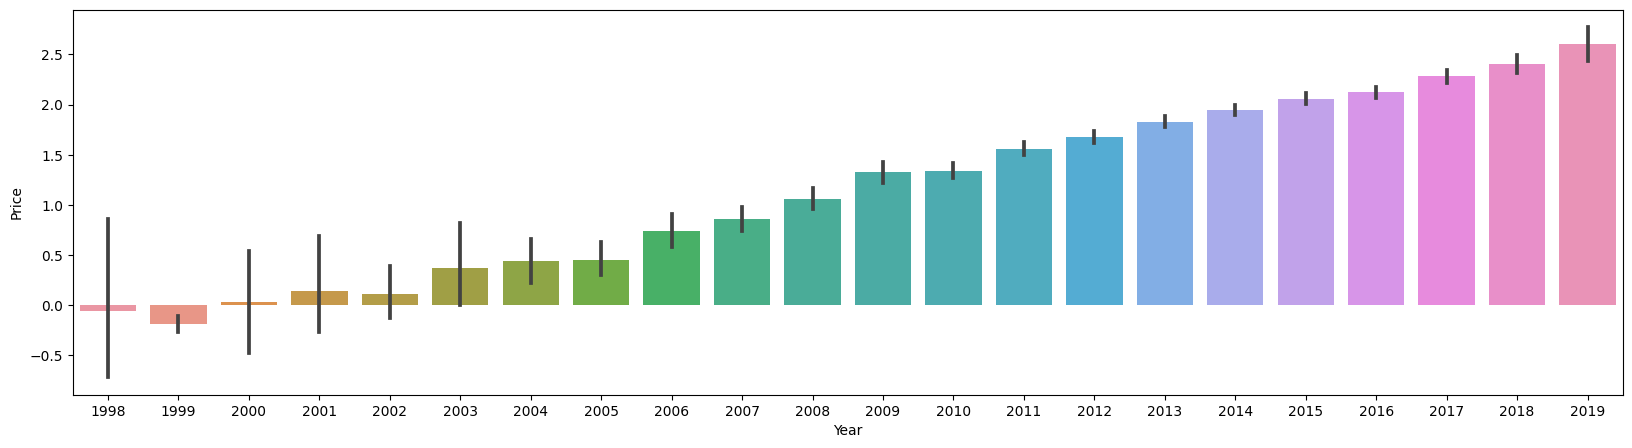

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Year',y='Price',data=df_train)
# as recent the the year is more is the price of the vehicle

([<matplotlib.patches.Wedge at 0x7f345293e6a0>,
 [Text(1.0112115338779715, 0.432956387817711, 'Mumbai'),
  Text(0.42906959977780945, 1.0128668612144986, 'Pune'),
  Text(-0.33402044530500774, 1.0480602759947752, 'Coimbatore'),
  Text(-0.9239921305875528, 0.5968572212952398, 'Hyderabad'),
  Text(-1.096756586883349, -0.08440965068039886, 'Kochi'),
  Text(-0.8510369030234709, -0.6969477668320774, 'Kolkata'),
  Text(-0.33938294785178286, -1.0463360907029033, 'Delhi'),
  Text(0.2251202439208809, -1.076717639763092, 'Chennai'),
  Text(0.6870963050401131, -0.8590102837569665, 'Jaipur'),
  Text(0.9814461936789012, -0.496752824766198, 'Bangalore'),
  Text(1.0906352436902387, -0.143229763739015, 'Ahmedabad')],
 [Text(0.5515699275698026, 0.23615802971875144, '12.88%'),
  Text(0.23403796351516876, 0.5524728333897265, '11.49%'),
  Text(-0.18219297016636785, 0.5716692414516955, '11.08%'),
  Text(-0.5039957075932106, 0.32555848434285806, '10.84%'),
  Text(-0.5982308655727357, -0.04604162764385392, '9.

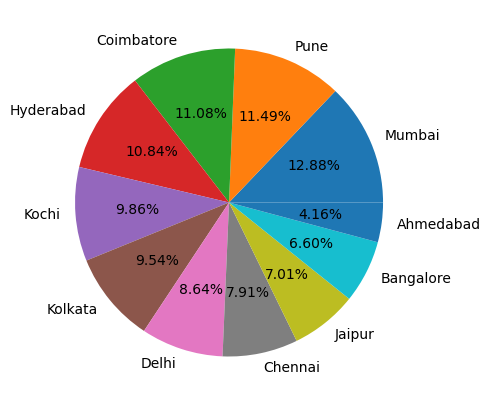

In [ ]:
loc_y=df_test['Location'].value_counts().index
loc_x=df_test['Location'].value_counts().values
plt.figure(figsize=(20,5))
plt.pie(loc_x,labels=loc_y,autopct="%1.2f%%")
#most of the vehicle are from mumbai then pune,Coimbatore

<Axes: xlabel='Location', ylabel='Price'>

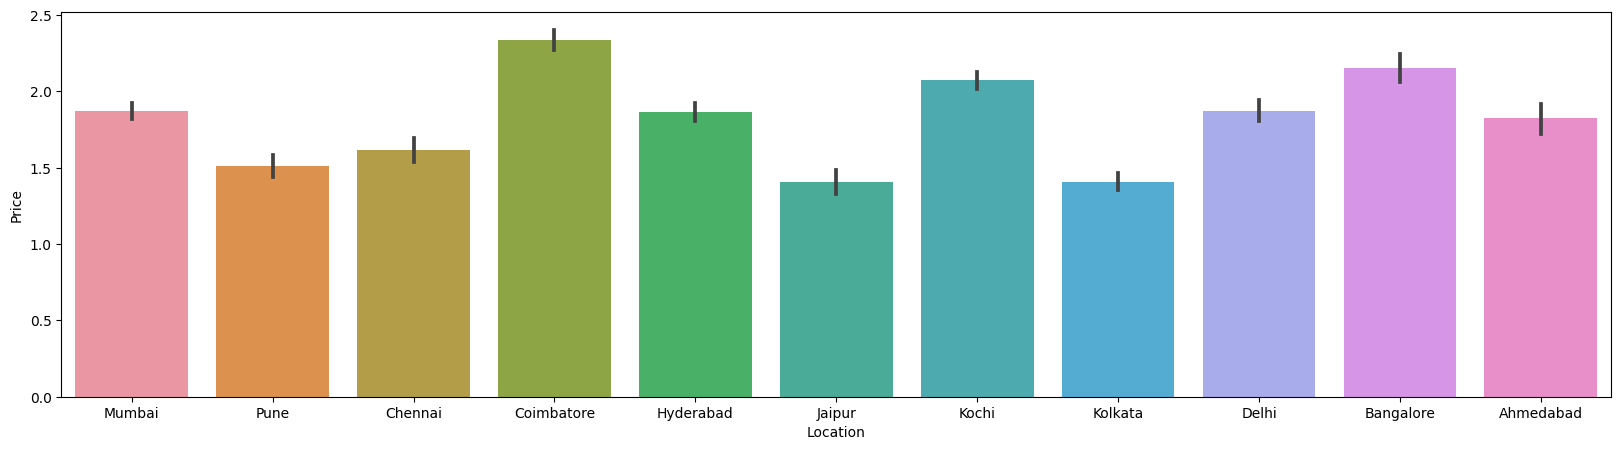

In [ ]:
plt.figure(figsize=(20,5))
sns.barplot(x='Location',y='Price',data=df_train)

In [ ]:
df_train['Location'].unique()

array(['Mumbai', 'Pune', 'Chennai', 'Coimbatore', 'Hyderabad', 'Jaipur',
       'Kochi', 'Kolkata', 'Delhi', 'Bangalore', 'Ahmedabad'],
      dtype=object)

In [ ]:
df_train['Location']=df_train['Location'].map({'Mumbai':1, 'Pune':2, 'Chennai':3, 'Coimbatore':4, 'Hyderabad':5, 'Jaipur':6,
       'Kochi':7, 'Kolkata':8, 'Delhi':9, 'Bangalore':10, 'Ahmedabad':11})
df_test['Location']=df_test['Location'].map({'Mumbai':1, 'Pune':2, 'Chennai':3, 'Coimbatore':4, 'Hyderabad':5, 'Jaipur':6,
       'Kochi':7, 'Kolkata':8, 'Delhi':9, 'Bangalore':10, 'Ahmedabad':11})

In [ ]:
df_train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price,Cars
0,1,1,2010,72000,1,1,1,26.60,998.0,58.16,5.0,0.559616,Maruti Wagon
1,2,2,2015,41000,2,1,1,19.67,1582.0,126.20,5.0,2.525729,Hyundai Creta


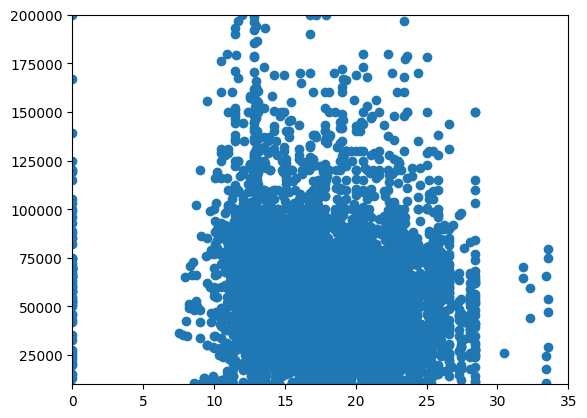

In [ ]:
# Mileage
plt.scatter(df_train['Mileage'], df_train['Kilometers_Driven'])
plt.xlim([0,35])
plt.ylim([10000,200000])
plt.show()
# most of vehicle driven from 0 to 1 lakhs km gives mileage around 12 to 27

<ipython-input-118-040f8cd6098a>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



<Axes: >

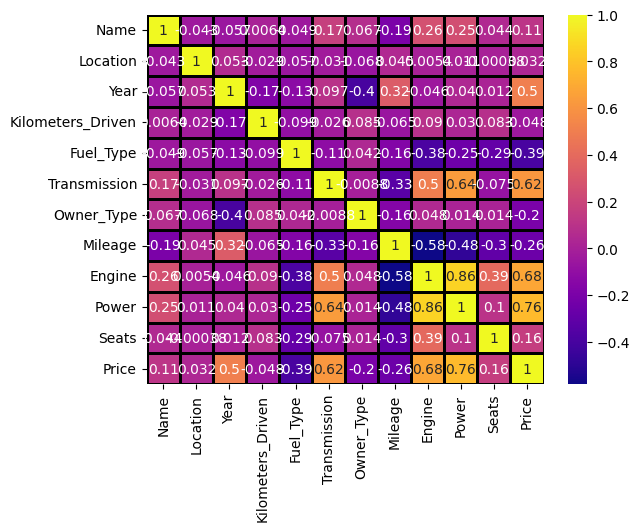

In [ ]:
tc = df_train.corr()
sns.heatmap(tc, annot = True, cmap ='plasma',
            linecolor ='black', linewidths = 1)
#price have highest correlation power then engine,transmission,year then fuel type

In [ ]:
df_train.drop(['Cars'],axis=1,inplace=True)

In [ ]:
df_train.iloc[4815]

Name                     9.000000
Location                 2.000000
Year                  2012.000000
Kilometers_Driven    75000.000000
Fuel_Type                2.000000
Transmission             1.000000
Owner_Type               3.000000
Mileage                 20.540000
Engine                1598.000000
Power                  103.600000
Seats                    5.000000
Price                    1.252763
Name: 4815, dtype: float64

In [ ]:
df_train.iloc[1]

Name                     2.000000
Location                 2.000000
Year                  2015.000000
Kilometers_Driven    41000.000000
Fuel_Type                2.000000
Transmission             1.000000
Owner_Type               1.000000
Mileage                 19.670000
Engine                1582.000000
Power                  126.200000
Seats                    5.000000
Price                    2.525729
Name: 1, dtype: float64

In [ ]:
df_test.drop('Cars',axis=1,inplace=True)

In [ ]:
df_train.drop('Engine',axis=1,inplace=True)
df_test.drop('Engine',axis=1,inplace=True)

In [ ]:
df_test.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats
0,23,9,2014,40929,1,1,1,32.26,58.2,4.0
1,23,4,2013,54493,3,1,2,24.70,47.3,5.0


In [ ]:
df_train.head(2)

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Power,Seats,Price
0,1,1,2010,72000,1,1,1,26.60,58.16,5.0,0.559616
1,2,2,2015,41000,2,1,1,19.67,126.20,5.0,2.525729


In [ ]:
class Node():
    def __init__(self, feature_index=None, threshold=None, left=None, right=None, var_red=None, value=None):
        ''' constructor ''' 
        
        # for decision node
        self.feature_index = feature_index
        self.threshold = threshold
        self.left = left
        self.right = right
        self.var_red = var_red
        
        # for leaf node
        self.value = value

In [ ]:
class DecisionTreeRegressor():
    def __init__(self, min_samples_split=2, max_depth=2, n_feats=0):
        ''' constructor '''
        
        # initialize the root of the tree 
        self.root = None
        
        # stopping conditions
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats=n_feats
        
    def build_tree(self, dataset, curr_depth=0):
        ''' recursive function to build the tree '''
        
        X, Y = dataset[:,:-1], dataset[:,-1]
        if(self.n_feats==0 or self.n_feats>np.shape(X) or self.n_feats==np.shape(X)):
          num_samples,num_features = np.shape(X)
        else:
          num_samples,num_features = np.shape(X)
          num_features=self.n_feats
        best_split = {}
        # split until stopping conditions are met
        if num_samples>=self.min_samples_split and curr_depth<=self.max_depth:
            # find the best split
            best_split = self.get_best_split(dataset, num_samples, num_features)
            # check if information gain is positive
            if best_split["var_red"]>0:
                # recur left
                left_subtree = self.build_tree(best_split["dataset_left"], curr_depth+1)
                # recur right
                right_subtree = self.build_tree(best_split["dataset_right"], curr_depth+1)
                # return decision node
                return Node(best_split["feature_index"], best_split["threshold"], 
                            left_subtree, right_subtree, best_split["var_red"])
        
        # compute leaf node
        leaf_value = self.calculate_leaf_value(Y)
        # return leaf node
        return Node(value=leaf_value)
    def get_best_split(self, dataset, num_samples, num_features):
        ''' function to find the best split '''
        
        # dictionary to store the best split
        best_split = {}
        max_var_red = -float("inf")
        # loop over all the features
        for feature_index in range(num_features):
            feature_values = dataset[:, feature_index]
            possible_thresholds = np.unique(feature_values)
            # loop over all the feature values present in the data
            for threshold in possible_thresholds:
                # get current split
                dataset_left, dataset_right = self.split(dataset, feature_index, threshold)
                # check if childs are not null
                if len(dataset_left)>0 and len(dataset_right)>0:
                    y, left_y, right_y = dataset[:, -1], dataset_left[:, -1], dataset_right[:, -1]
                    # compute information gain
                    curr_var_red = self.variance_reduction(y, left_y, right_y)
                    # update the best split if needed
                    if curr_var_red>max_var_red:
                        best_split["feature_index"] = feature_index
                        best_split["threshold"] = threshold
                        best_split["dataset_left"] = dataset_left
                        best_split["dataset_right"] = dataset_right
                        best_split["var_red"] = curr_var_red
                        max_var_red = curr_var_red
                        
        # return best split
        return best_split
    def split(self, dataset, feature_index, threshold):
        ''' function to split the data '''
        
        dataset_left = np.array([row for row in dataset if row[feature_index]<=threshold])
        dataset_right = np.array([row for row in dataset if row[feature_index]>threshold])
        return dataset_left, dataset_right
    
    def variance_reduction(self, parent, l_child, r_child):
        ''' function to compute variance reduction '''
        
        weight_l = len(l_child) / len(parent)
        weight_r = len(r_child) / len(parent)
        reduction = np.var(parent) - (weight_l * np.var(l_child) + weight_r * np.var(r_child))
        return reduction
    
    def calculate_leaf_value(self, Y):
        ''' function to compute leaf node '''
        
        val = np.mean(Y)
        return val
    def print_tree(self, tree=None, indent=" "):
        ''' function to print the tree '''
        
        if not tree:
            tree = self.root

        if tree.value is not None:
            print(tree.value)

        else:
            print("X_"+str(tree.feature_index), "<=", tree.threshold, "?", tree.var_red)
            print("%sleft:" % (indent), end="")
            self.print_tree(tree.left, indent + indent)
            print("%sright:" % (indent), end="")
            self.print_tree(tree.right, indent + indent)
    
    def fit(self, X, Y):
        ''' function to train the tree '''
        
        dataset = np.concatenate((X, Y), axis=1)
        self.root = self.build_tree(dataset)
        
    def make_prediction(self, x, tree):
        ''' function to predict new dataset '''
        
        if tree.value!=None: return tree.value
        feature_val = x[tree.feature_index]
        if feature_val<=tree.threshold:
            return self.make_prediction(x, tree.left)
        else:
            return self.make_prediction(x, tree.right)
    def predict(self, X):
        ''' function to predict a single data point '''
        
        preditions = [self.make_prediction(x, self.root) for x in X]
        return preditions
  

In [ ]:
X = df_train.iloc[:, :-1].values
Y = df_train.iloc[:, -1].values.reshape(-1,1)
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.2, random_state=41)

In [ ]:
regressor = DecisionTreeRegressor(min_samples_split=3, max_depth=3,n_feats=0)
regressor.fit(X_train,Y_train)
regressor.print_tree()

X_8 <= 135.1 ? 0.3700196753883673
 left:X_2 <= 2011.0 ? 0.12197441605670017
  left:X_8 <= 100.0 ? 0.07507946432855614
    left:X_2 <= 2007.0 ? 0.07427637500275619
        left:0.27299904055050417
        right:0.873539836853706
    right:X_0 <= 8.0 ? 0.04749880417828681
        left:1.85124385880659
        right:1.2171801341486832
  right:X_8 <= 86.8 ? 0.06267074985945059
    left:X_8 <= 69.01 ? 0.032503293039384124
        left:1.1803266958061764
        right:1.568774952391056
    right:X_2 <= 2015.0 ? 0.03639837447378966
        left:1.7999557120187546
        right:2.1925353981614184
 right:X_2 <= 2012.0 ? 0.14678354090315415
  left:X_8 <= 181.03 ? 0.1206127437817579
    left:X_0 <= 51.0 ? 0.07791660651415605
        left:2.289115166022545
        right:1.7298909121285817
    right:X_2 <= 2009.0 ? 0.07061644849402288
        left:2.3260521105820766
        right:2.9062517103785277
  right:X_8 <= 163.7 ? 0.11841531177072867
    left:X_2 <= 2014.0 ? 0.06108456862469219
        left:

In [ ]:
Y_pred = regressor.predict(X_test) 
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(Y_test, Y_pred))

0.40236282249039457

In [ ]:
from collections import Counter

import numpy as np


def bootstrap_sample(X, y):
    n_samples = X.shape[0]
    idxs = np.random.choice(n_samples, n_samples, replace=True)
    return X[idxs], y[idxs]


def most_common_label(y):
    counter = Counter(y)
    most_common = counter.most_common(1)[0][0]
    return most_common


class RandomForest:
    def __init__(self, n_trees=2, min_samples_split=3, max_depth=3, n_feats=0):
        self.n_trees = n_trees
        self.min_samples_split = min_samples_split
        self.max_depth = max_depth
        self.n_feats = n_feats
        self.trees = []

    def fit(self, X, y):
        self.trees = []
        for _ in range(self.n_trees):
            tree = DecisionTreeRegressor(
                min_samples_split=self.min_samples_split,
                max_depth=self.max_depth,
                n_feats=self.n_feats
            )
            X_samp, y_samp = bootstrap_sample(X, y)
            tree.fit(X_samp, y_samp)
            self.trees.append(tree)

    def predict(self, X):
        tree_preds = np.array([tree.predict(X) for tree in self.trees])
        tree_preds = np.array(np.swapaxes(tree_preds, 0, 1))
        predictions=[]
        for i in tree_preds:
          predictions.append(np.mean(i))
        #y_pred = [most_common_label(tree_pred) for tree_pred in tree_preds]
        return np.array(predictions)


# Testing
if __name__ == "__main__":
    # Imports
    from sklearn import datasets
    from sklearn.model_selection import train_test_split

    def accuracy(y_true, y_pred):
        accuracy = np.sum(y_true == y_pred) / len(y_true)
        return accuracy

    X = df_train.iloc[:, :-1].values
    Y = df_train.iloc[:, -1].values.reshape(-1,1)
    X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=41)

    clf = RandomForest(n_trees=2, max_depth=3)

    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    from sklearn.metrics import mean_squared_error
    from sklearn.metrics import mean_absolute_error
    print("MAE",mean_absolute_error(y_test,y_pred))
    print("MSE",mean_squared_error(y_test, y_pred))
    print("RMSE",np.sqrt(mean_squared_error(y_test, y_pred)))
    #acc = accuracy(y_test, y_pred)

    #print("Accuracy:", acc)

MAE 0.2794370500403193
MSE 0.15119606537626337
RMSE 0.3888393824913616


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 2, stop = 200, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(start=3, stop=10, num = 1)]
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5,7]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}
pprint(random_grid)

{'max_depth': [3],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 3, 5, 7],
 'n_estimators': [2, 24, 46, 68, 90, 112, 134, 156, 178, 200]}


In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestRegressor()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.9/dist-packages/sklearn/model_selection/_search.py:909: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

/usr/local/lib/python3.9/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning:

`max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.



RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [3],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 3, 5, 7],
                                        'n_estimators': [2, 24, 46, 68, 90, 112,
                                                         134, 156, 178, 200]},
                   random_state=42, verbose=2)

In [ ]:
rf_random.best_params_

{'n_estimators': 46,
 'min_samples_split': 2,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 3}

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.iloc[:, :-1].values
Y = df_train.iloc[:, -1].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=.2, random_state=41)


In [ ]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

In [ ]:
def knn(X_train, y_train, X_test, k):
    # calculate distances between each training point and test point
    distances = [euclidean_distance(X_test, x) for x in X_train]
    # get the k nearest neighbors
    k_indices = np.argsort(distances)[:k]
    
    # get the corresponding target values
    k_nearest_neighbors = y_train[k_indices]
    
    # return the mean of the k nearest neighbors
    return np.mean(k_nearest_neighbors)
    #y_pred = []
    #for i in range(len(X_test)):
     #   dist = np.sqrt(np.sum((X_train - X_test[i])**2, axis=1))
      #  indices = np.argsort(dist)[:k]
       # y_pred.append(np.mean(y_train[indices]))
    #return y_pred

In [ ]:
predictions = [knn(X_train, y_train, x, k=4) for x in X_test]

# print the predictions
print(predictions)

[1.0792720083787426, 1.8373398584265437, 2.209107421628138, 1.5047359962714564, 1.2619249595582678, 1.707940935431302, 2.0660288520488965, 1.4476243300461806, 1.7159508478632386, 1.8878959066817511, 1.9543887096772723, 1.4021782064804897, 1.995424387451153, 0.9681247945851194, 1.5602151173915644, 3.030063226065149, 1.3950008433685892, 1.2256051773638807, 1.9713146737560705, 1.7684191036020778, 1.6368867007593284, 1.3362488253827987, 2.106274870305745, 2.900653902526152, 1.795972653820435, 1.8221101086089742, 0.9337565318344877, 2.793312842905559, 1.2479548449596538, 3.044627021179171, 1.7039356952109528, 1.6683343368808088, 3.3813313388235935, 1.7629184470607866, 1.9968289703318258, 1.6483724529259989, 1.2817042620964163, 1.579618754805584, 1.1583979531911066, 1.814145147186521, 2.486155499559607, 1.5255980344518458, 1.2331796811470657, 1.9490681746931222, 1.7535308529558056, 3.147470806270264, 2.819538062173714, 2.132003607511955, 3.5492885844509052, 2.0070927241562857, 1.133552774261

In [ ]:
len(predictions)

1204

In [ ]:
print("MAE",mean_absolute_error(y_test,predictions))
print("MSE",mean_squared_error(y_test, predictions))
print("RMSE",np.sqrt(mean_squared_error(y_test, predictions)))

#MAE 0.5141990919081593
#MSE 0.43778469747515114
#RMSE 0.6616530038284049


MAE 0.5141990919081593
MSE 0.43778469747515114
RMSE 0.6616530038284049


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import accuracy_score
knn=KNeighborsRegressor()
from sklearn.model_selection import GridSearchCV
k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=10) #, scoring='accuracy',error_score='raise', return_train_score=False,verbose=1)
#y_train=y_train.ravel() 
# fitting the model for grid search
grid.fit(X_train, y_train)
grid.best_params_

{'n_neighbors': 4}

In [ ]:
import math
import numpy as np 
import pandas as pd
from collections import defaultdict

In [ ]:
class XGBoostModel():
    '''XGBoost from Scratch
    '''
    
    def __init__(self, params, random_seed=None):
        self.params = defaultdict(lambda: None, params)
        self.subsample = self.params['subsample'] \
            if self.params['subsample'] else 1.0
        self.learning_rate = self.params['learning_rate'] \
            if self.params['learning_rate'] else 0.3
        self.base_prediction = self.params['base_score'] \
            if self.params['base_score'] else 0.5
        self.max_depth = self.params['max_depth'] \
            if self.params['max_depth'] else 5
        self.rng = np.random.default_rng(seed=random_seed)
                
    def fit(self, X, y, objective, num_boost_round, verbose=False):
        current_predictions = self.base_prediction * np.ones(shape=y.shape)
        self.boosters = []
        for i in range(num_boost_round):
            gradients = objective.gradient(y, current_predictions)
            hessians = objective.hessian(y, current_predictions)
            sample_idxs = None if self.subsample == 1.0 \
                else self.rng.choice(len(y), 
                                     size=math.floor(self.subsample*len(y)), 
                                     replace=False)
            booster = TreeBooster(X, gradients, hessians, 
                                  self.params, self.max_depth, sample_idxs)
            current_predictions += self.learning_rate * booster.predict(X)
            self.boosters.append(booster)
            if verbose: 
                print(f'[{i}] train loss = {objective.loss(y, current_predictions)}')
            
    def predict(self, X):
        return (self.base_prediction + self.learning_rate 
                * np.sum([booster.predict(X) for booster in self.boosters], axis=0))

In [ ]:
class TreeBooster():
 
    def __init__(self, X, g, h, params, max_depth, idxs=None):
        self.params = params
        self.max_depth = max_depth
        assert self.max_depth >= 0, 'max_depth must be nonnegative'
        self.min_child_weight = params['min_child_weight'] \
            if params['min_child_weight'] else 1.0
        self.reg_lambda = params['reg_lambda'] if params['reg_lambda'] else 1.0
        self.gamma = params['gamma'] if params['gamma'] else 0.0
        self.colsample_bynode = params['colsample_bynode'] \
            if params['colsample_bynode'] else 1.0
        if isinstance(g, pd.Series): g = g.values
        if isinstance(h, pd.Series): h = h.values
        if idxs is None: idxs = np.arange(len(g))
        self.X, self.g, self.h, self.idxs = X, g, h, idxs
        self.n, self.c = len(idxs), X.shape[1]
        self.value = -g[idxs].sum() / (h[idxs].sum() + self.reg_lambda) # Eq (5)
        self.best_score_so_far = 0.
        if self.max_depth > 0:
            self._maybe_insert_child_nodes()

    def _maybe_insert_child_nodes(self):
        for i in range(self.c): self._find_better_split(i)
        if self.is_leaf: return
        x = self.X.values[self.idxs,self.split_feature_idx]
        left_idx = np.nonzero(x <= self.threshold)[0]
        right_idx = np.nonzero(x > self.threshold)[0]
        self.left = TreeBooster(self.X, self.g, self.h, self.params, 
                                self.max_depth - 1, self.idxs[left_idx])
        self.right = TreeBooster(self.X, self.g, self.h, self.params, 
                                 self.max_depth - 1, self.idxs[right_idx])

    @property
    def is_leaf(self): return self.best_score_so_far == 0.
    
    def _find_better_split(self, feature_idx):
        x = self.X.values[self.idxs, feature_idx]
        g, h = self.g[self.idxs], self.h[self.idxs]
        sort_idx = np.argsort(x)
        sort_g, sort_h, sort_x = g[sort_idx], h[sort_idx], x[sort_idx]
        sum_g, sum_h = g.sum(), h.sum()
        sum_g_right, sum_h_right = sum_g, sum_h
        sum_g_left, sum_h_left = 0., 0.

        for i in range(0, self.n - 1):
            g_i, h_i, x_i, x_i_next = sort_g[i], sort_h[i], sort_x[i], sort_x[i + 1]
            sum_g_left += g_i; sum_g_right -= g_i
            sum_h_left += h_i; sum_h_right -= h_i
            if sum_h_left < self.min_child_weight or x_i == x_i_next:continue
            if sum_h_right < self.min_child_weight: break

            gain = 0.5 * ((sum_g_left**2 / (sum_h_left + self.reg_lambda))
                            + (sum_g_right**2 / (sum_h_right + self.reg_lambda))
                            - (sum_g**2 / (sum_h + self.reg_lambda))
                            ) - self.gamma/2 # Eq(7) 
            if gain > self.best_score_so_far: 
                self.split_feature_idx = feature_idx
                self.best_score_so_far = gain
                self.threshold = (x_i + x_i_next) / 2
                
    def predict(self, X):
        return np.array([self._predict_row(row) for i, row in X.iterrows()])

    def _predict_row(self, row):
        if self.is_leaf: 
            return self.value
        child = self.left if row[self.split_feature_idx] <= self.threshold \
            else self.right
        return child._predict_row(row)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_train.drop('Price',axis=1,inplace=False)
Y = df_train['Price']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=43)

In [ ]:
class SquaredErrorObjective():
    def loss(self, y, pred): return np.mean((y - pred)**2)
    def gradient(self, y, pred): return pred - y
    def hessian(self, y, pred): return np.ones(len(y))

In [ ]:
params = {
    'learning_rate': 0.1,
    'max_depth': 5,
    'subsample': 0.8,
    'reg_lambda': 1.5,
    'gamma': 0.0,
    'min_child_weight': 25,
    'base_score': 0.0,
    'tree_method': 'exact',
}
num_boost_round = 50

# train the from-scratch XGBoost model
model_scratch = XGBoostModel(params, random_seed=42)
model_scratch.fit(X_train, y_train, SquaredErrorObjective(), num_boost_round)

In [ ]:
pred_scratch = model_scratch.predict(X_test)
print(f'scratch score: {SquaredErrorObjective().loss(y_test, pred_scratch)}')

scratch score: 0.05658108972775064


In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print("MAE",mean_absolute_error(y_test,pred_scratch))
print("MSE",mean_squared_error(y_test, pred_scratch))
print("RMSE",np.sqrt(mean_squared_error(y_test, pred_scratch)))

MAE 0.16434682747221555
MSE 0.05658108972775064
RMSE 0.2378677988458098


In [ ]:
# MAE 0.2812153894613909
# MSE 0.14726504726 530668
# RMSE 0.3837512830796878

In [ ]:
import sklearn
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

from xgboost import XGBRegressor

X, y = datasets.fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y)

pipeline = Pipeline([('scaler', MinMaxScaler()), ('regressor', XGBRegressor())])
pipeline.fit(X_train, y_train)

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=None,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=None, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=100,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
pipeline.score(X_test, y_test)

0.830901595811218

In [ ]:
pipeline.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'regressor', 'scaler__clip', 'scaler__copy', 'scaler__feature_range', 'regressor__objective', 'regressor__base_score', 'regressor__booster', 'regressor__callbacks', 'regressor__colsample_bylevel', 'regressor__colsample_bynode', 'regressor__colsample_bytree', 'regressor__early_stopping_rounds', 'regressor__enable_categorical', 'regressor__eval_metric', 'regressor__feature_types', 'regressor__gamma', 'regressor__gpu_id', 'regressor__grow_policy', 'regressor__importance_type', 'regressor__interaction_constraints', 'regressor__learning_rate', 'regressor__max_bin', 'regressor__max_cat_threshold', 'regressor__max_cat_to_onehot', 'regressor__max_delta_step', 'regressor__max_depth', 'regressor__max_leaves', 'regressor__min_child_weight', 'regressor__missing', 'regressor__monotone_constraints', 'regressor__n_estimators', 'regressor__n_jobs', 'regressor__num_parallel_tree', 'regressor__predictor', 'regressor__random_state', 'regressor__reg_alpha

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV
hyperparameter_grid = {
    'regressor__n_estimators': [100, 500, 1000, 2000],
    'regressor__max_depth': [3, 6, 9, 12],
    'regressor__learning_rate': [0.01, 0.03, 0.05, 0.1]
}


random_cv = RandomizedSearchCV(estimator=pipeline,
            param_distributions=hyperparameter_grid,
            cv=3, 
            n_iter=5,
            scoring = 'neg_root_mean_squared_error',
            n_jobs = -1,
            verbose = 5, 
            return_train_score = True,
            random_state=42)



random_cv.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('scaler', MinMaxScaler()),
                                             ('regressor',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=None,
                                                           colsample_bytree=None,
                                                           early_stopping_rounds=None,
                                                           enable_categorical=False,
                                                           eval_metric=None,
                                                           feature_types=None,
                                                           gamma=None,
                                                           gpu_id=None,
                                                           grow_policy=None,
                                                           importanc...
                                                           n_estimators=100,
                                                           n_jobs=None,
                                                           num_parallel_tree=None,
                                                           predictor=None,
                                                           random_state=None, ...))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'regressor__learning_rate': [0.01, 0.03,
                                                                     0.05,
                                                                     0.1],
                                        'regressor__max_depth': [3, 6, 9, 12],
                                        'regressor__n_estimators': [100, 500,
                                                                    1000,
                                                                    2000]},
                   random_state=42, return_train_score=True,
                   scoring='neg_root_mean_squared_error', verbose=5)

In [ ]:
best_pipe = random_cv.best_estimator_

In [ ]:
best_pipe

Pipeline(steps=[('scaler', MinMaxScaler()),
                ('regressor',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=None, early_stopping_rounds=None,
                              enable_categorical=False, eval_metric=None,
                              feature_types=None, gamma=None, gpu_id=None,
                              grow_policy=None, importance_type=None,
                              interaction_constraints=None, learning_rate=0.1,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=9, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, n_estimators=1000,
                              n_jobs=None, num_parallel_tree=None,
                              predictor=None, random_state=None, ...))])

In [ ]:
best_pipe.score(X_test, y_test)

0.8385996115699804